# 1) Setup

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import networkx as nx
import re

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [272]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_square import *
from distances_angle_max import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *

#4) Classification
from get_length import *
from get_connections import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
print("done")

done


In [3]:
# retrieve data
df_aaf = pd.read_excel("aaf_unimodal.xlsx")
df_aaf = df_aaf[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
df_aaf.head(2)

,origin,target,edge_id,time_to_waypoint,operation_time
0,Station,ChargingPoint,Station_ChargingPoint,0.624420,19.893930
1,ChargingPoint,Station,ChargingPoint_Station,17.028488,23.572407


In [44]:
# retrieve data
df_aaf_y4 = pd.read_excel("aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]

# retrieve data
df_aaf_y3 = pd.read_excel("aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]

# retrieve data
df_aaf_y2 = pd.read_excel("aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
df_aaf_y2.head(2)

,origin,target,edge_id,time_to_waypoint,operation_time
0,Station,WayPoint2,Station_WayPoint2,0.328289,2.676215
1,WayPoint2,WayPoint86,WayPoint2_WayPoint86,0.236417,9.111409


In [262]:
# retrieve data
df_tsc_bob = pd.read_excel("tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
df_tsc_y3.head(2)

,origin,target,edge_id,time_to_waypoint,operation_time
0,ChargingPoint,Station,ChargingPoint_Station,26.468006,38.898573
1,Station,ChargingPoint,Station_ChargingPoint,0.413475,68.313145


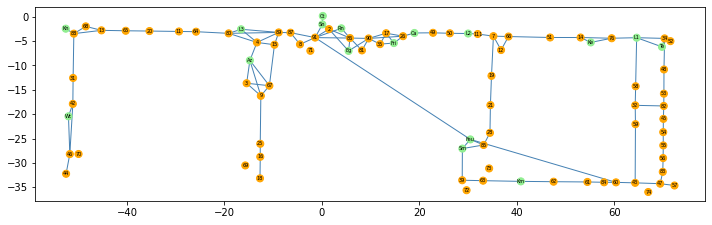

In [4]:
#draw maps
#G = draw_graph("labs_map.yaml", same_scale = True, size = 2, rotate = False)
G = draw_graph("aaf_map.yaml", same_scale = True, size = 2, rotate = True)
#G = draw_graph_tsc("tsc_map.yaml", same_scale = True, size = 2, rotate = False)

# 2) Cluster by KS (AAF)

## 2a) Operation time

In [254]:
ks_matrix, ks_edges = distances_ks(df_aaf, metric = "operation_time", cutoff = 10)

0 edges: 0.03941178321838379 secs
10 edges: 7.775572776794434 secs
20 edges: 14.87345004081726 secs
30 edges: 20.902721643447876 secs
40 edges: 26.837340354919434 secs
50 edges: 31.85305428504944 secs
60 edges: 36.2406792640686 secs
70 edges: 41.170140504837036 secs
80 edges: 45.321908712387085 secs
90 edges: 48.71129035949707 secs
100 edges: 52.09513449668884 secs
110 edges: 55.51607322692871 secs
120 edges: 59.110896587371826 secs
130 edges: 62.5041298866272 secs
140 edges: 65.8443558216095 secs
150 edges: 69.67763447761536 secs
160 edges: 71.07408618927002 secs
170 edges: 71.08206510543823 secs
180 edges: 71.09004306793213 secs
Time taken: 71.09502577781677 secs


Optimum no. of clusters: 14
Max silhouette coeff: 0.24605416172564226


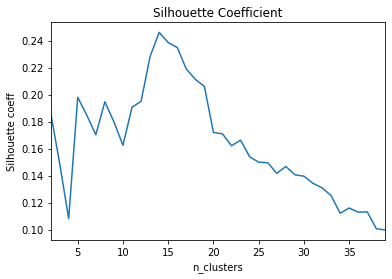

In [255]:
n_clusters, s_list = optimum_clusters(ks_matrix, max_clusters = 40, method = "ss")

In [256]:
clustering = AgglomerativeClustering(n_clusters=14, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix )
print(labels)
ks_clusters = pd.DataFrame(index = np.arange(len(ks_edges)),columns = ["edge_id", "cluster_id"])
ks_clusters["edge_id"] = ks_edges
ks_clusters["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[13  8  8  7  5  6  6 10  5  1 13 13 13  1  5  7  5  5 13  8  9  5  8  8
 13  8  0  0 13  5  1  4 11  5 13  5  8  2  5 13  5 13  4  1  1  8  0  1
  1  4  5  8  1 13 13 13 13  2  2  8  1  8  0  8  8 11  0  9  0  8 12  4
  4  4  2  0  1  4  4  4  5  5  2  2  6 13  4 10 10 10 10  7  1  5  5  4
  1  5  7 13  5  4  0  7  8  4  7 11  8 13  2  4  1 10  7 10  6  6  4  6
 10  2  4 10  7 13  5  2  7  2  7 12  7  3  7  6  4  2 12  2  1  2  1  4
 13  5  4  5  6  0 13  3  5  5]
14 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
CLuster 8 has colour code: lime
CLuster 9 has colour code: cyan
CLuster 10 has colour code: darkgray
CLuster 11 has colour code: pink
CLuster 12 has colour code: brown
CLuster 13 has colour code: olive
Edges without enough data are black


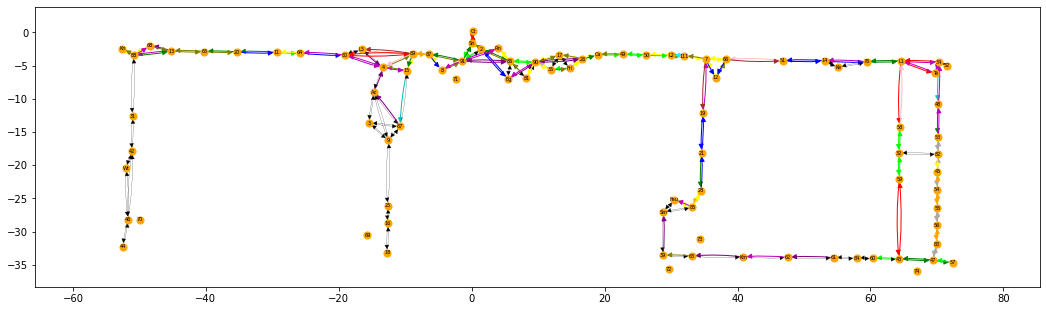

In [8]:
G = draw_clusters("aaf_map.yaml", ks_clusters, size = 3, rotate = True)
plt.savefig("clusters_ks_aaf_14.png", dpi = 1000, bbox_inches = "tight")

## 2b) operation_time - time_to_waypoint

In [237]:
ks_matrix2, ks_edges2 = distances_ks(df_aaf, metric = "difference", cutoff = 20)

0 edges: 0.037929534912109375 secs
10 edges: 7.330509424209595 secs
20 edges: 13.473792791366577 secs
30 edges: 19.107523441314697 secs
40 edges: 24.247457265853882 secs
50 edges: 28.358218908309937 secs
60 edges: 32.512370586395264 secs
70 edges: 36.30967164039612 secs
80 edges: 40.02604603767395 secs
90 edges: 43.78499913215637 secs
100 edges: 47.65577030181885 secs
110 edges: 51.13906741142273 secs
120 edges: 54.62218999862671 secs
130 edges: 58.104567766189575 secs
140 edges: 59.54631805419922 secs
150 edges: 59.554296255111694 secs
160 edges: 59.56227517127991 secs
170 edges: 59.57025384902954 secs
180 edges: 59.578232526779175 secs
Time taken: 59.583219051361084 secs


Optimum no. of clusters: 4
Max CH index: 39.17168858690104


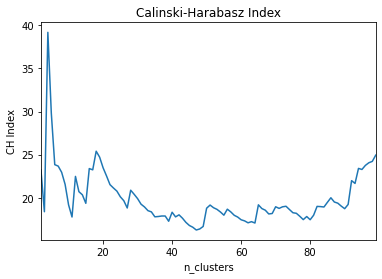

In [239]:
n_clusters, s_list = optimum_clusters(ks_matrix2, max_clusters = 100, method = "ch")

In [240]:
clustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix2 )
print(labels)
ks_clusters2 = pd.DataFrame(index = np.arange(len(ks_edges2)),columns = ["edge_id", "cluster_id"])
ks_clusters2["edge_id"] = ks_edges2
ks_clusters2["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 3 3 2 3 1 1 1 3 2 3 2 2 3 3 2 3 3 1 3 1 3 3 3 3 3 0 3 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 3 0 3 2 2 3 3 2 3 3 3 3 2 2 3 2 3 0 3 3 0 0 1 0 3 0 2 3 2
 2 2 2 2 2 2 1 3 2 2 1 3 2 1 1 1 1 2 2 3 3 2 2 3 2 1 3 2 0 2 3 2 2 0 3 3 2
 2 2 1 2 1 1 1 2 1 1 2 2 1 3 3 3 2 3 3 2 0 2 0]
4 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
Edges without enough data are black


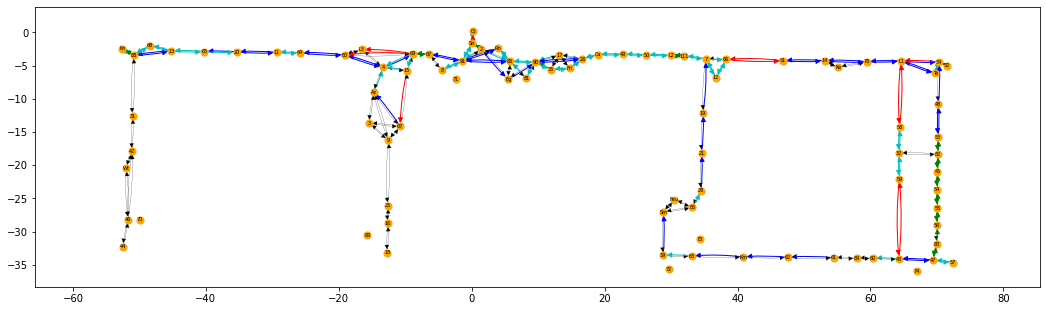

In [61]:
G = draw_clusters("aaf_map.yaml", ks_clusters2, size = 3, rotate = True)
plt.savefig("clusters_ks_aaf_diff.png", dpi = 1000, bbox_inches = "tight")

## 2c) Same cluster but difference lengths
- 43_59 vs 43_47
- 43_59 vs 39_Sm

N_observations: 74 90
KstestResult(statistic=0.9777777777777777, pvalue=3.3306690738754696e-16)


Text(0.5, 1.0, 'WayPoint43_WayPoint59 vs WayPoint43_WayPoint47')

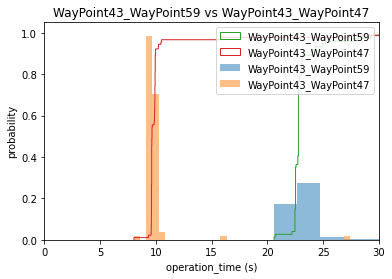

In [77]:
# 1) Select data of interest
origin = "WayPoint43"
target = "WayPoint59"
edge1 = origin + "_" + target
subset1 = select_data_edge(df_aaf, edge1)
#independent variable to plot over
t_op1 = subset1["operation_time"] - subset1["time_to_waypoint"] 
#t_op1 = subset1["operation_time"] 

origin = "WayPoint43"
target = "WayPoint47"
edge2 = origin + "_" + target
subset2 = select_data_edge(df_aaf, edge2)
#independent variable to plot over
t_op2 = subset2["operation_time"] - subset2["time_to_waypoint"] 
#t_op2 = subset2["operation_time"] 

#Plot against actual data
precision = 2
t_start= 10**(-precision)
t_stop = ( (np.max(t_op1)) //5)*5 + 5    #round up to nearest 5 secs
t_step = 10**(-precision)
t_test = np.arange(t_start,t_stop,t_step)

#plot kde
#p_kde1 = kde(t_test, t_op1, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde1, alpha = 1)
#p_kde2 = kde(t_test, t_op2, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde2, alpha = 1)

#plot actual
print("N_observations:", len(subset1), len(subset2))
print(sp.stats.ks_2samp(t_op1, t_op2))
plt.hist(t_op1, density = True, bins = 50, alpha = 0.5);
plt.hist(t_op2, density = True, bins = 50, alpha = 0.5);

plt.hist(t_op1, bins = 2000, density=True, histtype='step',cumulative=True)
plt.hist(t_op2, bins = 2000, density=True, histtype='step',cumulative=True)

plt.legend([edge1, edge2, edge1, edge2])
plt.xlabel("operation_time (s)")
plt.ylabel("probability")
plt.xlim([0,30])
plt.title(edge1 + " vs " + edge2)


N_observations: 74 32
KstestResult(statistic=1.0, pvalue=1.1102230246251565e-16)


Text(0.5, 1.0, 'WayPoint43_WayPoint59 vs WayPoint39_Seminarraum')

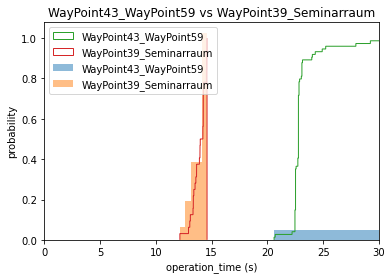

In [76]:
# 1) Select data of interest
origin = "WayPoint43"
target = "WayPoint59"
edge1 = origin + "_" + target
subset1 = select_data_edge(df_aaf, edge1)
#independent variable to plot over
t_op1 = subset1["operation_time"] - subset1["time_to_waypoint"] 
#t_op1 = subset1["operation_time"] 

origin = "WayPoint39"
target = "Seminarraum"
edge2 = origin + "_" + target
subset2 = select_data_edge(df_aaf, edge2)
#independent variable to plot over
t_op2 = subset2["operation_time"] - subset2["time_to_waypoint"] 
#t_op2 = subset2["operation_time"] 

#Plot against actual data
precision = 2
t_start= 10**(-precision)
t_stop = ( (np.max(t_op1)) //5)*5 + 5    #round up to nearest 5 secs
t_step = 10**(-precision)
t_test = np.arange(t_start,t_stop,t_step)

#plot kde
#p_kde1 = kde(t_test, t_op1, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde1, alpha = 1)
#p_kde2 = kde(t_test, t_op2, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde2, alpha = 1)

#plot actual
print("N_observations:", len(subset1), len(subset2))
print(sp.stats.ks_2samp(t_op1, t_op2))
plt.hist(t_op1, density = True, bins = 5, alpha = 0.5);
plt.hist(t_op2, density = True, bins = 5, alpha = 0.5);

plt.hist(t_op1, bins = 2000, density=True, histtype='step',cumulative=True)
plt.hist(t_op2, bins = 2000, density=True, histtype='step',cumulative=True)

plt.legend([edge1, edge2, edge1, edge2])
plt.xlabel("operation_time (s)")
plt.ylabel("probability")
plt.xlim([0,30])
plt.title(edge1 + " vs " + edge2)


## 2d) Opposite directions on same edge in different clusters
- 67_15 vs 15_67
- 53_48 vs 48_53

N_observations: 871 50
KstestResult(statistic=0.25175660160734786, pvalue=0.003957422324123772)


Text(0.5, 1.0, 'WayPoint86_WayPoint91 vs Lift1_Teekueche')

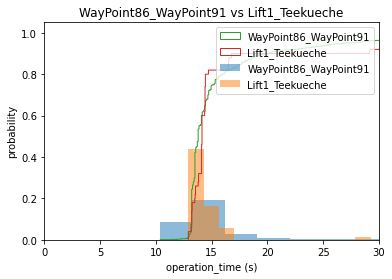

In [221]:
# 1) Select data of interest
origin = "WayPoint86"
target = "WayPoint91"
edge1 = origin + "_" + target
subset1 = select_data_edge(df_aaf_merge, edge1)
#independent variable to plot over
t_op1 = subset1["operation_time"] - subset1["time_to_waypoint"] 
#t_op1 = subset1["operation_time"] 

origin = "Lift1"
target = "Teekueche"
edge2 = origin + "_" + target
subset2 = select_data_edge(df_aaf_merge, edge2)
#independent variable to plot over
t_op2 = subset2["operation_time"] - subset2["time_to_waypoint"] 
#t_op2 = subset2["operation_time"] 

#Plot against actual data
precision = 2
t_start= 10**(-precision)
t_stop = ( (np.max(t_op1)) //5)*5 + 5    #round up to nearest 5 secs
t_step = 10**(-precision)
t_test = np.arange(t_start,t_stop,t_step)

#plot kde
#p_kde1 = kde(t_test, t_op1, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde1, alpha = 1)
#p_kde2 = kde(t_test, t_op2, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde2, alpha = 1)

#plot actual
print("N_observations:", len(subset1), len(subset2))
print(sp.stats.ks_2samp(t_op1, t_op2))
plt.hist(t_op1, density = True, bins = 50, alpha = 0.5);
plt.hist(t_op2, density = True, bins = 50, alpha = 0.5);

plt.hist(t_op1, bins = 2000, density=True, histtype='step',cumulative=True)
plt.hist(t_op2, bins = 2000, density=True, histtype='step',cumulative=True)

plt.legend([edge1, edge2, edge1, edge2])
plt.xlabel("operation_time (s)")
plt.ylabel("probability")
plt.xlim([0,30])
plt.title(edge1 + " vs " + edge2)


N_observations: 42 25
KstestResult(statistic=0.44095238095238093, pvalue=0.0029141446030480633)


Text(0.5, 1.0, 'WayPoint53_WayPoint82 vs WayPoint82_WayPoint53')

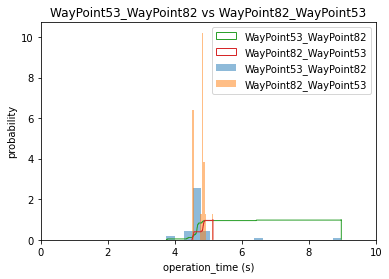

In [155]:
# 1) Select data of interest
origin = "WayPoint53"
target = "WayPoint82"
edge1 = origin + "_" + target
subset1 = select_data_edge(df_aaf, edge1)
#independent variable to plot over
t_op1 = subset1["operation_time"] - subset1["time_to_waypoint"] 
#t_op1 = subset1["operation_time"] 

origin = "WayPoint82"
target = "WayPoint53"
edge2 = origin + "_" + target
subset2 = select_data_edge(df_aaf, edge2)
#independent variable to plot over
t_op2 = subset2["operation_time"] - subset2["time_to_waypoint"] 
#t_op2 = subset2["operation_time"] 

#Plot against actual data
precision = 2
t_start= 10**(-precision)
t_stop = ( (np.max(t_op1)) //5)*5 + 5    #round up to nearest 5 secs
t_step = 10**(-precision)
t_test = np.arange(t_start,t_stop,t_step)

#plot kde
#p_kde1 = kde(t_test, t_op1, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde1, alpha = 1)
#p_kde2 = kde(t_test, t_op2, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde2, alpha = 1)

#plot actual
print("N_observations:", len(subset1), len(subset2))
print(sp.stats.ks_2samp(t_op1, t_op2))
plt.hist(t_op1, density = True, bins = 20, alpha = 0.5);
plt.hist(t_op2, density = True, bins = 20, alpha = 0.5);

plt.hist(t_op1, bins = 2000, density=True, histtype='step',cumulative=True)
plt.hist(t_op2, bins = 2000, density=True, histtype='step',cumulative=True)

plt.legend([edge1, edge2, edge1, edge2])
plt.xlabel("operation_time (s)")
plt.ylabel("probability")
plt.xlim([0,10])
plt.title(edge1 + " vs " + edge2)


# 3) Compare classification methods

## 3a) Dataloaders

In [260]:
df_class_diff = dataloader6(ks_clusters2, filename = "aaf_map.yaml")
df_class_diff.tail()

Time taken (dataloader6): 12.588626384735107 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8906,Eingang_WayPoint90,WayPoint67_Ambulanz,1,1.71135,1,2,1,0.763128,5.46619
8907,Eingang_WayPoint90,WayPoint15_WayPoint67,0,3.63044,0,2,2,0.309054,3.80076
8908,WayPoint89_Lift3,WayPoint67_Ambulanz,0,1.19892,1,1,0,0.629868,0.0824065
8909,WayPoint89_Lift3,WayPoint15_WayPoint67,1,0.720161,2,1,1,0.175794,1.58302
8910,WayPoint67_Ambulanz,WayPoint15_WayPoint67,0,1.91908,1,0,1,0.454074,1.66543


## 3b) Unbalanced dataset

Samples drawn: 8911
1000 datapoints: 2.886641025543213 secs
2000 datapoints: 6.262150764465332 secs
3000 datapoints: 10.449394941329956 secs
4000 datapoints: 15.563043594360352 secs
5000 datapoints: 21.56999683380127 secs
6000 datapoints: 28.26532506942749 secs
7000 datapoints: 36.35282063484192 secs
8000 datapoints: 45.67367935180664 secs
Time taken: 45.67367935180664 secs


Text(0.5, 1.0, 'Comparison of classification methods')

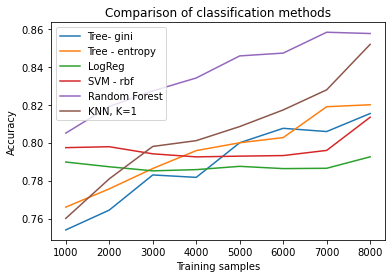

In [44]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(1000,len(df_class_random),1000)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Comparison of classification methods")

print(max(accuracy_rf))
plt.savefig("CompareClassificationMethods_Balanced.png", bbox_inches="tight", dpi = 1000)

## 3c) Balanced Dataset
- Equal number of True/False

100 datapoints: 0.8145503997802734 secs
200 datapoints: 1.65590238571167 secs
300 datapoints: 2.5621047019958496 secs
400 datapoints: 3.584336757659912 secs
500 datapoints: 4.665516376495361 secs
600 datapoints: 5.780505418777466 secs
700 datapoints: 6.926440715789795 secs
800 datapoints: 8.121342897415161 secs
900 datapoints: 9.424598932266235 secs
1000 datapoints: 10.701225757598877 secs
1100 datapoints: 12.029642343521118 secs
1200 datapoints: 13.417407274246216 secs
1300 datapoints: 14.854062557220459 secs
1400 datapoints: 16.35709047317505 secs
1500 datapoints: 17.84510850906372 secs
1600 datapoints: 19.38751983642578 secs
1700 datapoints: 20.998717308044434 secs
1800 datapoints: 22.610461950302124 secs
1900 datapoints: 24.27218461036682 secs
2000 datapoints: 26.141704559326172 secs
Time taken: 26.142704248428345 secs


Text(0.5, 1.0, 'Comparison of classification methods')

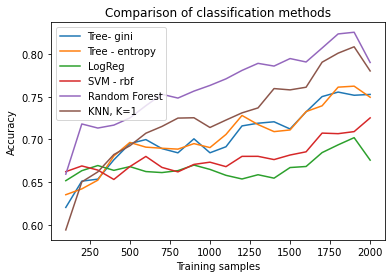

In [32]:
#Balanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = True)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(100,2100,100)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Comparison of classification methods")

print(max(accuracy_rf))
plt.savefig("CompareClassificationMethods_Unbalanced.png", bbox_inches="tight", dpi = 1000)

## 3d) Cross validation (Random Forest)

In [35]:
#cross validation - gini
cv = 10
y = list(df_class_random["same_cluster"])
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])
clf=RandomForestClassifier(criterion = "gini", n_estimators=100)
cv_results = cross_validate(clf, X, y, cv=cv)
print("Mean:", cv_results["test_score"].mean())
print("Std:", cv_results["test_score"].std())

Mean: 0.8006367558962758
Std: 0.020780506012490554


<Figure size 432x288 with 0 Axes>

## 3e) Feature importance (Random Forest)

Samples drawn: 8911
edge_length_diff           0.549317
max_angle_diff             0.176364
sum_angle_diff             0.170607
total_connections_diff     0.042270
origin_connections_diff    0.033282
target_connections_diff    0.028161
dtype: float64


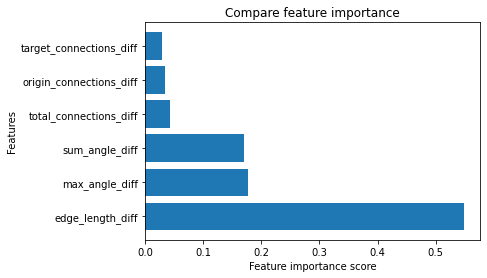

In [261]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#class labels
n_train = 10000
y = np.array(df_class_random["same_cluster"])
y = y[0:n_train]
y_test = np.array(df_class_random["same_cluster"])
y_test = y_test[n_train:]
y = y.astype(float)
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][0:n_train])

X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])
    

#1) Create Classifier
#criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
#max_depthint, default=None. The maximum depth of the tree. 

clf=RandomForestClassifier(n_estimators=100)

#2) Train 
clf.fit(X,y)

#3) Show importance
feature_names = ["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(importance)
y_pos = [i for i in range(len(importance.index))]

plt.barh(y_pos, importance);
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Compare feature importance")
plt.yticks(y_pos, importance.index);
plt.savefig("CompareFeatureImportance_Y4.png", bbox_inches="tight", dpi = 1000)

## 3f) Different numbers of clusters

Samples drawn: 8911
Time taken (dataloader6): 12.52454686164856 secs
Time taken (dataloader6): 11.553841352462769 secs
Time taken (dataloader6): 14.907069444656372 secs
Time taken (dataloader6): 14.86006236076355 secs
5 datapoints: 107.13736915588379 secs
Time taken (dataloader6): 14.065272569656372 secs
Time taken (dataloader6): 13.872930765151978 secs
Time taken (dataloader6): 14.77664852142334 secs
Time taken (dataloader6): 14.080697059631348 secs
Time taken (dataloader6): 14.097657918930054 secs
10 datapoints: 228.0162389278412 secs
Time taken (dataloader6): 14.059486627578735 secs
Time taken (dataloader6): 14.113929033279419 secs
Time taken (dataloader6): 14.220947742462158 secs
Time taken (dataloader6): 14.041362047195435 secs
Time taken (dataloader6): 14.080714225769043 secs
15 datapoints: 353.279324054718 secs
Time taken (dataloader6): 13.952064752578735 secs
Time taken (dataloader6): 14.461466550827026 secs
Time taken (dataloader6): 14.248889923095703 secs
Time taken (dataload

AttributeError: 'Line2D' object has no property 'colour'

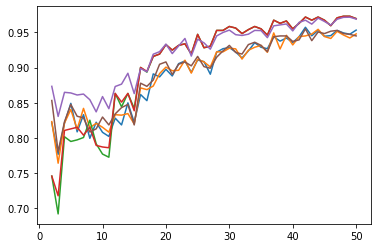

In [69]:
# Unbalanced dataset
tic = time.time()

df_class_random = dataloader_random(df_class_diff, balanced = False)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train = len(df_class_random)*9//10
n_iter = 5
max_clusters = 51
n_clusters_range = np.arange(2,max_clusters,1)

accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []
proportion_0 = []


for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage = 'average')
    labels = clustering.fit_predict( ks_matrix2 )
    ks_clusters2 = pd.DataFrame(index = np.arange(len(ks_edges2)),columns = ["edge_id", "cluster_id"])
    ks_clusters2["edge_id"] = ks_edges2
    ks_clusters2["cluster_id"] = labels
    
    #) Get dataset into correct format
    df_class_diff = dataloader6(ks_clusters2, filename = "aaf_map.yaml")
    df_class_random = dataloader_random(df_class_diff, balanced = False, suppress_message = True)
    proportion_0.append(len(df_class_random[df_class_random["same_cluster"]==0])/(len(df_class_random[df_class_random["same_cluster"]==0])+len(df_class_random[df_class_random["same_cluster"]==1])) )
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])

    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    if n_clusters % 5 == 0:
        toc = time.time()
        print(n_clusters, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")

print(max(accuracy_rf))

#8) Plot
plt.plot(n_clusters_range, accuracy_gini)
plt.plot(n_clusters_range, accuracy_entropy)
plt.plot(n_clusters_range, accuracy_lr)
plt.plot(n_clusters_range, accuracy_svm)
plt.plot(n_clusters_range, accuracy_rf)
plt.plot(n_clusters_range, accuracy_knn)
plt.plot(n_clusters_range, proportion_0, color = "k")
plt.xlabel("n_clusters")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1", "% labels = 0"])
plt.title("Comparison of classification methods")

plt.savefig("Compare50Clusters_LabelProportion.png", bbox_inches="tight", dpi = 1000)

0.9717488789237667


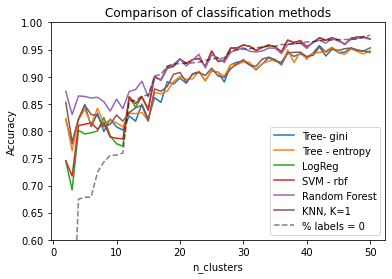

In [76]:
print(max(accuracy_rf))

#8) Plot
plt.plot(n_clusters_range, accuracy_gini)
plt.plot(n_clusters_range, accuracy_entropy)
plt.plot(n_clusters_range, accuracy_lr)
plt.plot(n_clusters_range, accuracy_svm)
plt.plot(n_clusters_range, accuracy_rf)
plt.plot(n_clusters_range, accuracy_knn)
plt.plot(n_clusters_range, proportion_0, color = "k", linestyle = "dashed", alpha = 0.5)
plt.xlabel("n_clusters")
plt.ylabel("Accuracy")
plt.ylim([0.60,1])
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1", "% labels = 0"])
plt.title("Comparison of classification methods")

plt.savefig("Compare50Clusters_LabelProportion.png", bbox_inches="tight", dpi = 1000)

In [77]:
#store pd df
df_cluster_comp = pd.DataFrame(index = np.arange(len(accuracy_rf)), 
                               columns = ["n_clusters","accuracy_gini", "accuracy_entropy",
                                         "accuracy_lr", "accuracy_svm", "accuracy_rf",
                                         "accuracy_knn", "proportion_0"])
df_cluster_comp["n_clusters"] = n_clusters_range
df_cluster_comp["accuracy_gini"] = accuracy_gini
df_cluster_comp["accuracy_entropy"] = accuracy_entropy
df_cluster_comp["accuracy_lr"] =accuracy_lr 
df_cluster_comp["accuracy_svm"] =accuracy_svm
df_cluster_comp["accuracy_rf"] =accuracy_rf
df_cluster_comp["accuracy_knn"] =accuracy_knn
df_cluster_comp["proportion_0"] =proportion_0

df_cluster_comp.head()

,n_clusters,accuracy_gini,accuracy_entropy,accuracy_lr,accuracy_svm,accuracy_rf,accuracy_knn,proportion_0
0,2,0.821300,0.823094,0.745516,0.745516,0.873318,0.853139,0.266300
1,3,0.776457,0.763901,0.691704,0.717489,0.830493,0.780269,0.392212
2,4,0.820852,0.821076,0.801570,0.810538,0.864798,0.822870,0.675008
3,5,0.849103,0.840359,0.794843,0.812780,0.863901,0.847534,0.678375
4,6,0.808520,0.812332,0.797085,0.815022,0.860987,0.830717,0.678824


In [80]:
#6) save to excel
df_cluster_comp.to_excel("df_cluster_comp50.xlsx")
print("done")

done


In [79]:
# retrieve data
df_cluster_comp = pd.read_excel("df_cluster_comp.xlsx")
df_cluster_comp = df_cluster_comp[["n_clusters","accuracy_gini", "accuracy_entropy",
                                         "accuracy_lr", "accuracy_svm", "accuracy_rf",
                                         "accuracy_knn", "proportion_0"]]
df_cluster_comp.head(2)

,n_clusters,accuracy_gini,accuracy_entropy,accuracy_lr,accuracy_svm,accuracy_rf,accuracy_knn,proportion_0
0,2,0.821300,0.823094,0.745516,0.745516,0.873318,0.853139,0.266300
1,3,0.776457,0.763901,0.691704,0.717489,0.830493,0.780269,0.392212


# 4) Data from other years (AAF)

## 4a) Which edges have a lot of data

In [45]:
count_y4 = df_aaf_y4["edge_id"].value_counts()
count_y4.to_excel("count_y4.xlsx")
count_y4.head(5)

WayPoint35_Frisoer       602
WayPoint86_WayPoint90    600
Frisoer_WayPoint35       589
WayPoint86_WayPoint91    574
WayPoint90_WayPoint35    568
Name: edge_id, dtype: int64

In [46]:
count_y3 = df_aaf_y3["edge_id"].value_counts()
count_y3.to_excel("count_y3.xlsx")
count_y3.head(5)

WayPoint86_WayPoint90    445
WayPoint90_WayPoint86    419
WayPoint50_Lift2         375
Lift2_WayPoint50         373
WayPoint111_Lift2        362
Name: edge_id, dtype: int64

In [47]:
count_y2 = df_aaf_y2["edge_id"].value_counts()
count_y2.to_excel("count_y2.xlsx")
count_y2.head(5)

Station_WayPoint2        128
WayPoint2_Station        126
Station_ChargingPoint    121
WayPoint87_WayPoint89    119
WayPoint2_WayPoint86     116
Name: edge_id, dtype: int64

## 4b) Compare different datasets
We have plenty of data for
- 86_90
- 87_89
- 89_87
- etc

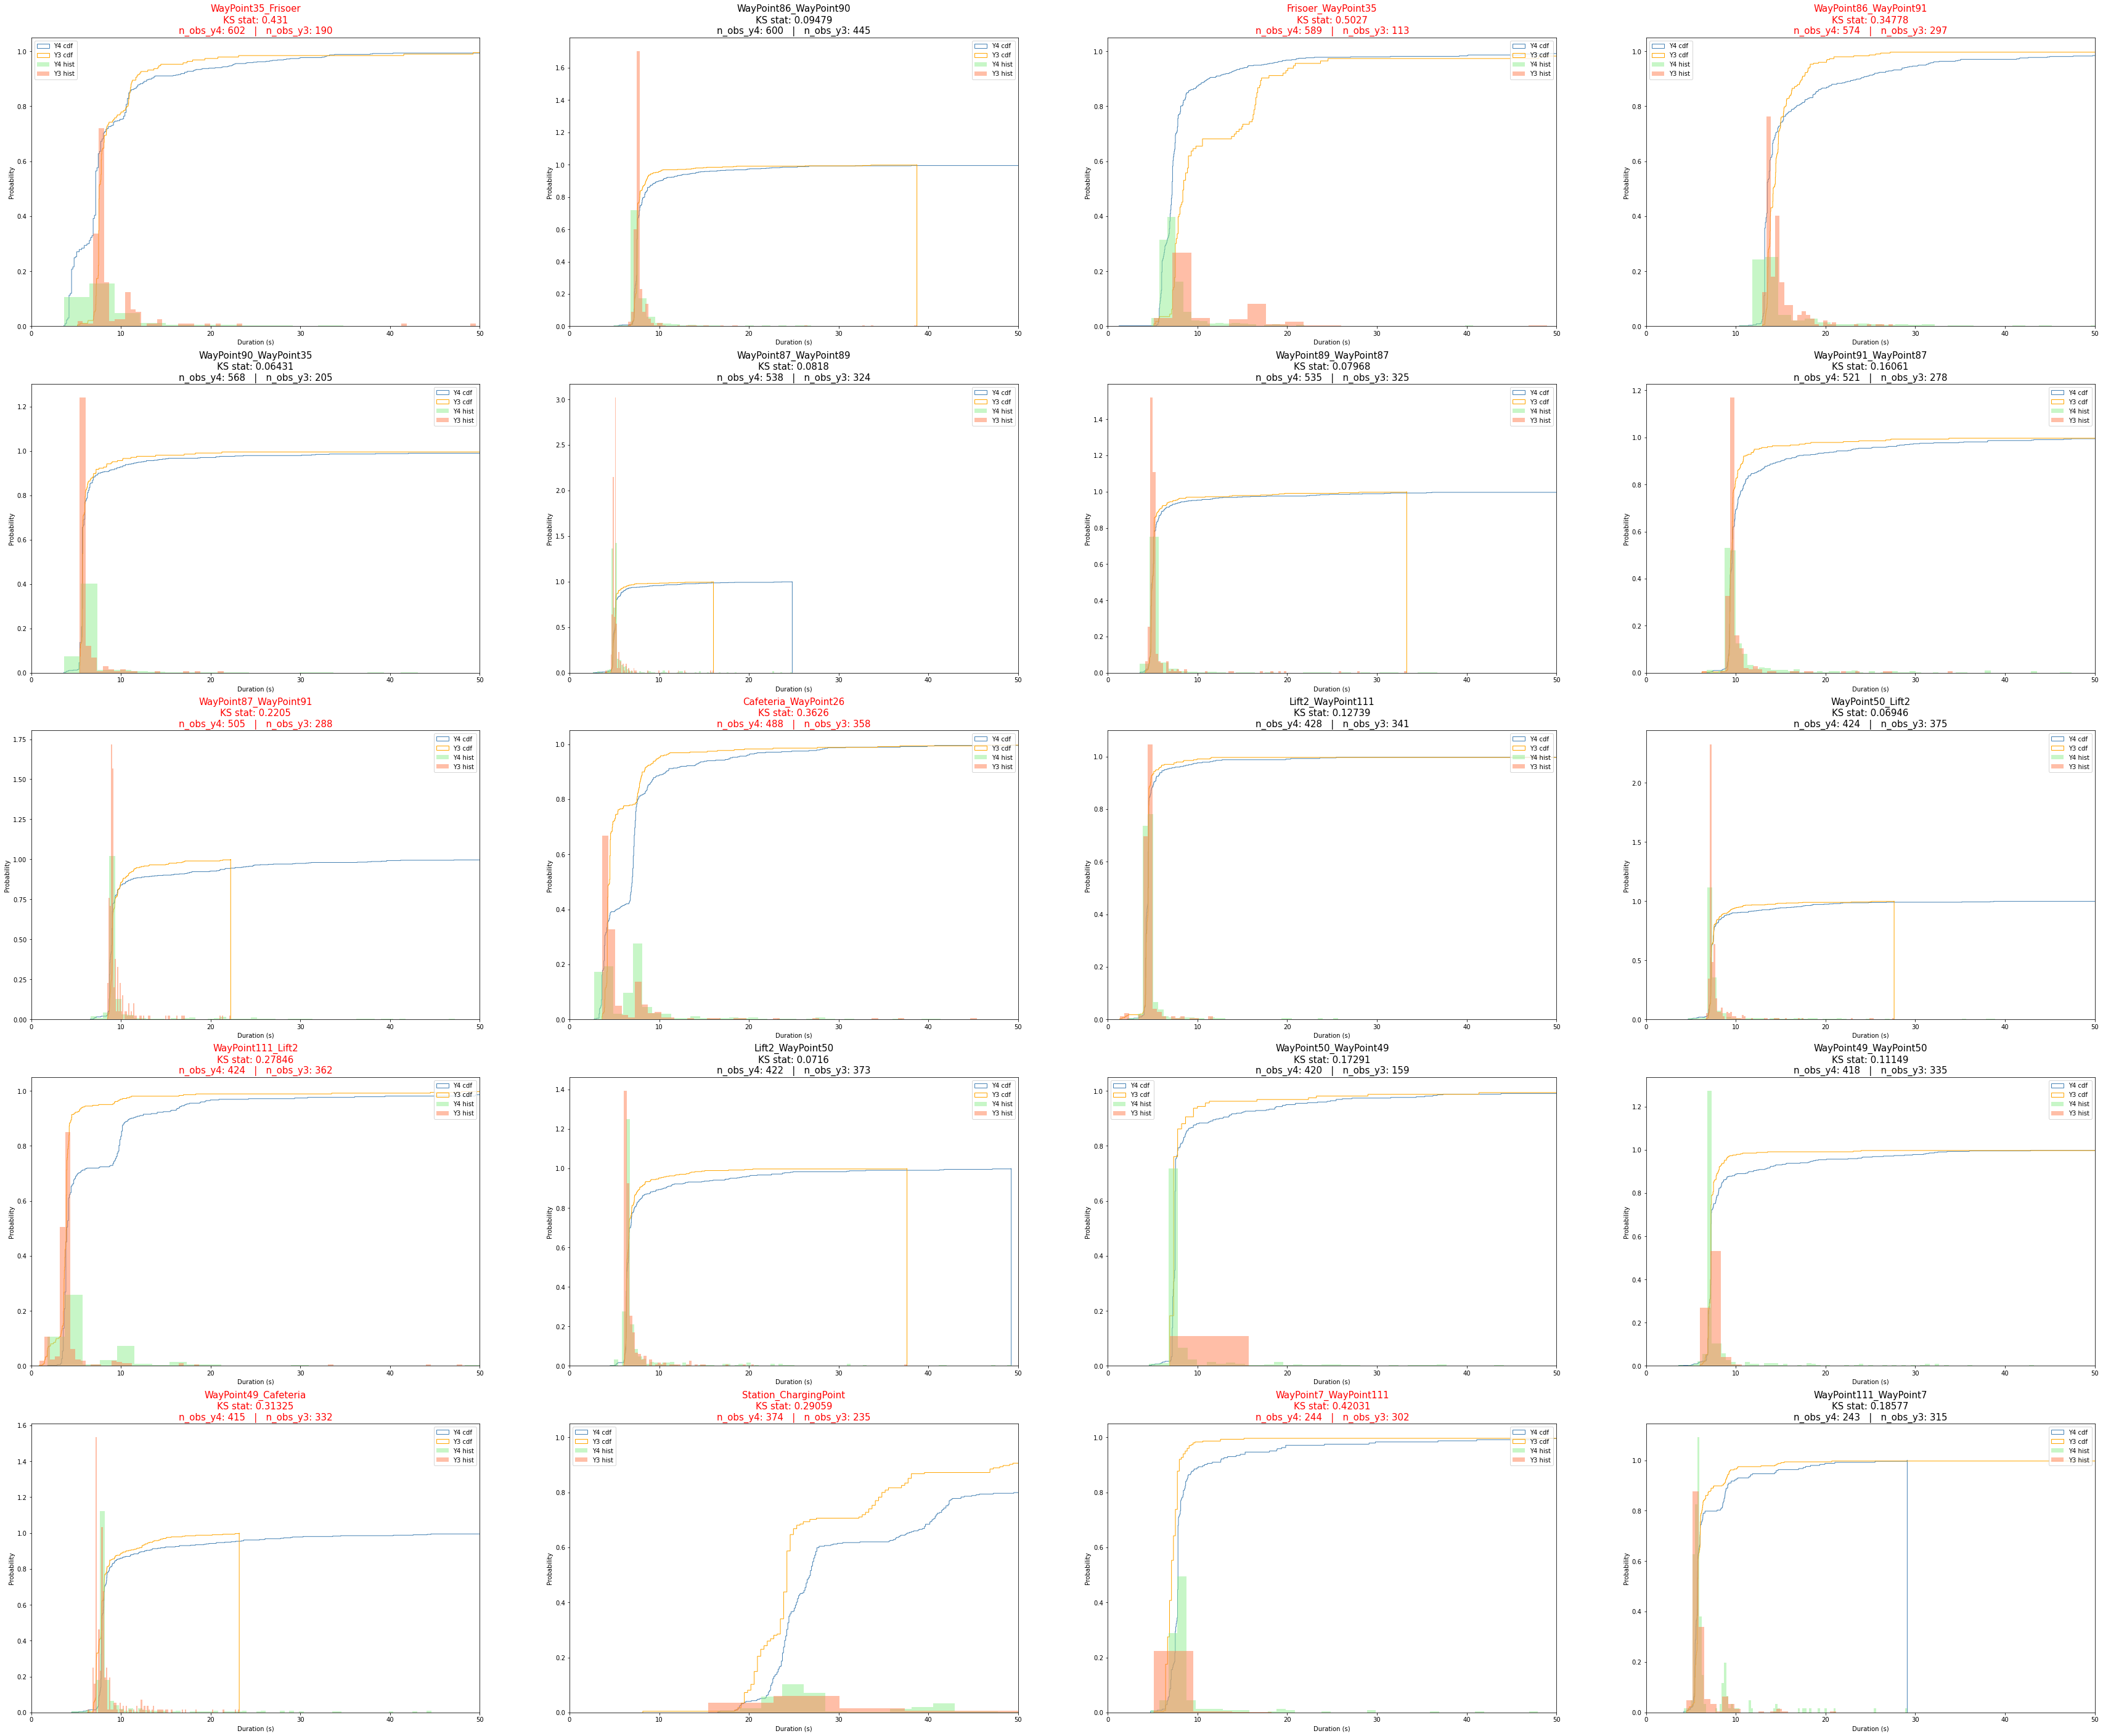

In [198]:
# 1) Select data of interest
edges = ["WayPoint35_Frisoer", "WayPoint86_WayPoint90", "Frisoer_WayPoint35", "WayPoint86_WayPoint91",
         "WayPoint90_WayPoint35", "WayPoint87_WayPoint89","WayPoint89_WayPoint87", "WayPoint91_WayPoint87",
         "WayPoint87_WayPoint91", "Cafeteria_WayPoint26","Lift2_WayPoint111", "WayPoint50_Lift2",
         "WayPoint111_Lift2", "Lift2_WayPoint50","WayPoint50_WayPoint49", "WayPoint49_WayPoint50",
         "WayPoint49_Cafeteria", "Station_ChargingPoint","WayPoint7_WayPoint111", "WayPoint111_WayPoint7"]

n_plots = len(edges)
n_cols = 4
n_rows = int(np.ceil(n_plots / n_cols))
balanced = False

#4) initialise subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15*n_cols,10*n_rows))

i = 0
for edge in edges:
    #independent variable to plot over
    subset1 = select_data_edge(df_aaf_y4, edge)
    t_op1 = subset1["operation_time"] - subset1["time_to_waypoint"] 
    #t_op1 = subset1["operation_time"]
    
    subset2 = select_data_edge(df_aaf_y3, edge)
    t_op2 = subset2["operation_time"] - subset2["time_to_waypoint"] 
    #t_op2 = subset2["operation_time"]
    
    if balanced == True:
        if len(t_op1) < len(t_op2):
            t_op2 = t_op2[:len(t_op1)]
        else:
            t_op1 = t_op1[:len(t_op2)]

    #Plot against actual data
    precision = 2
    t_start= 10**(-precision)
    t_stop = ( (np.max(t_op1)) //5)*5 + 5    #round up to nearest 5 secs
    t_step = 10**(-precision)
    t_test = np.arange(t_start,t_stop,t_step)

    #plot actual
    j = i // n_cols
    k = i % n_cols
    ks = np.round(sp.stats.ks_2samp(t_op1, t_op2)[0],5)
    
    axs[j,k].hist(t_op1, bins = 2000, density=True, histtype='step',cumulative=True, color = "steelblue")
    axs[j,k].hist(t_op2, bins = 2000, density=True, histtype='step',cumulative=True, color = "orange")
    axs[j,k].hist(t_op1, density = True, bins = 100, alpha = 0.5, color = "lightgreen");
    axs[j,k].hist(t_op2, density = True, bins = 100, alpha = 0.5, color = "coral");
    
    axs[j,k].set_xlabel("Duration (s)")
    axs[j,k].set_ylabel("Probability")
    axs[j,k].legend(["Y4 cdf", "Y3 cdf", "Y4 hist", "Y3 hist"])
    axs[j,k].set_xlim([0,50])
    if ks > 0.2:
        axs[j,k].set_title(edge    + "\nKS stat: " + str(ks)
                                   + "\nn_obs_y4: " + str(len(t_op1)) 
                                   + "   |   n_obs_y3: " + str(len(t_op2))  
                                   , fontsize = 15, color = "r")
    else:
        axs[j,k].set_title(edge    + "\nKS stat: " + str(ks)
                                   + "\nn_obs_y4: " + str(len(t_op1)) 
                                   + "   |   n_obs_y3: " + str(len(t_op2))  
                                   , fontsize = 15, color = "k")
    
    i += 1
if balanced == True:
    fig.savefig("AAF_Y3Y4_balanced.png", bbox_inches = "tight")
else:
    fig.savefig("AAF_Y3Y4.png", bbox_inches = "tight")

## 4c) Merge datasets & randomise

In [83]:
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)
df_aaf_merge.tail()

,origin,target,edge_id,time_to_waypoint,operation_time
44897,WayPoint90,WayPoint35,WayPoint90_WayPoint35,0.155049,5.591831
44898,WayPoint7,WayPoint19,WayPoint7_WayPoint19,0.185211,16.081076
44899,WayPoint7,WayPoint19,WayPoint7_WayPoint19,0.132905,18.134762
44900,WayPoint90,WayPoint35,WayPoint90_WayPoint35,4.019893,68.279445
44901,WayPoint20,WayPoint11,WayPoint20_WayPoint11,0.372822,11.638375


## 4d) Clustering for merged dataset

In [186]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  2 14:13:12 2021

@author: pyliu
"""
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

def optimum_clusters(distance_matrix, max_clusters = 15, method = "ss", linkage = "average"):
    """
    Returns score for each choice of n_cluster

    Parameters
    ----------
    distance_matrix : TYPE
        DESCRIPTION.
    max_clusters : INT, scalar
        Maximum number of clusters to test. The default is 15.
    method : STR
        Choose from ["ss", "ch", "db"], where "ss" uses silhouette score, "ch" uses Calinski-Harabasz index, "db" uses Davies-Bouldin index. 
        The default is "ss".
    linkage : STR
        Choose from ["average", "single", "complete"]

    Raises
    ------
    ValueError
        When method is invalid.
        Can only be one of ["ss", "ch", "db"]

    Returns
    -------
    n_clusters : INT, vector
        np.arange(2, max_cluster + 1)
    s_list : FLOAT, vector
        score for each number of clusters

    """
    valid_linkages = ["average", "single", "complete"]
    if linkage not in valid_linkages:
        raise ValueError('Invalid Linkage. Must be in ["average", "single", "complete"]')
        
    n_clusters = np.arange(2,max_clusters,1)
    s_list = []             #score list
    for i in n_clusters:
        clustering = AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage = linkage)
        labels = clustering.fit_predict( distance_matrix )
        if method == "ss":
            s = silhouette_score(distance_matrix , labels, metric='euclidean')
        elif method == "ch":
            s = calinski_harabasz_score(distance_matrix , labels)
        elif method == "db":
            s = davies_bouldin_score(distance_matrix , labels)
        else:
            raise ValueError("Method can be one of ['ss','ch','db']")
        s_list.append(s)
    
    plt.plot(n_clusters,s_list)
    plt.xlabel("n_clusters")
    plt.xlim([n_clusters[0], n_clusters[-1]]);
    if method == "ss":
        plt.title("Silhouette Coefficient")
        plt.ylabel("Silhouette coeff")
        print("Optimum no. of clusters:",n_clusters[np.argmax(s_list)])
        print("Max silhouette coeff:", np.max(s_list))
    elif method == "ch":
        plt.title("Calinski-Harabasz Index")
        plt.ylabel("CH Index")
        print("Optimum no. of clusters:",n_clusters[np.argmax(s_list)])
        print("Max CH index:", np.max(s_list))
    elif method == "db":
        plt.title("Davies-Bouldin Index")
        plt.ylabel("DB Index")
        print("Optimum no. of clusters:",n_clusters[np.argmin(s_list)])
        print("Min DB index:", np.min(s_list))
    else:
        raise ValueError("Method can be one of ['ss','ch','db']")     
    
    return n_clusters, s_list

In [84]:
ks_matrix3, ks_edges3 = distances_ks(df_aaf_merge, metric = "difference", cutoff = 20)

0 edges: 0.05041766166687012 secs
10 edges: 15.33876895904541 secs
20 edges: 28.932122945785522 secs
30 edges: 40.336389780044556 secs
40 edges: 50.04261827468872 secs
50 edges: 58.912078857421875 secs
60 edges: 66.62156367301941 secs
70 edges: 73.91255450248718 secs
80 edges: 80.80669403076172 secs
90 edges: 87.2903835773468 secs
100 edges: 93.73840045928955 secs
110 edges: 99.4499146938324 secs
120 edges: 106.61154127120972 secs
130 edges: 113.15044903755188 secs
140 edges: 119.10601115226746 secs
150 edges: 126.49840354919434 secs
160 edges: 133.2975037097931 secs
170 edges: 139.73517656326294 secs
180 edges: 142.63413882255554 secs
190 edges: 142.64411187171936 secs
200 edges: 142.65308785438538 secs
Time taken: 142.6640591621399 secs


Optimum no. of clusters: 5
Max silhouette coeff: 0.2974652638018016


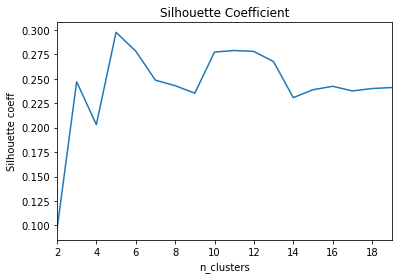

In [190]:
n_clusters, s_list = optimum_clusters(ks_matrix3, max_clusters = 20, method = "ss", linkage = "complete")

In [194]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage = "complete")
labels = clustering.fit_predict( ks_matrix3 )
print(labels)
ks_clusters3 = pd.DataFrame(index = np.arange(len(ks_edges3)),columns = ["edge_id", "cluster_id"])
ks_clusters3["edge_id"] = ks_edges3
ks_clusters3["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 1 1 1 2 2 4 2 2 2 3 3 1 2 1 0 1 2 2 2 3 4 2 2 1 2 2 2 2 3 2 1 1 2 3 3 3
 2 3 3 2 4 2 2 4 2 4 3 3 4 2 2 4 2 1 3 3 4 3 0 2 2 2 2 2 0 2 3 4 0 2 0 2 4
 2 3 0 3 0 3 2 2 3 3 0 4 3 2 4 4 4 0 0 1 2 2 4 2 4 4 1 1 1 2 1 0 2 1 1 1 0
 1 2 2 1 0 3 4 2 4 1 1 4 3 3 2 2 4 2 4 3 0 4 3 0 4 3 4 1 1 4 2 2 4 2 4 1 1
 1 2 4 1 1 3 4 2 3 2 3 3 2 1 2 4 2 2 0 2 4 3 3 4 0 2 3]
5 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
Edges without enough data are black


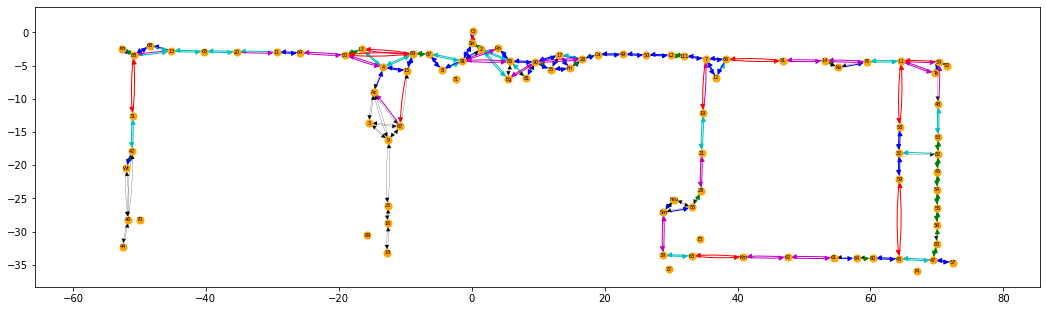

In [195]:
G = draw_clusters("aaf_map.yaml", ks_clusters3, size = 3, rotate = True)
plt.savefig("TEST_COMPLETE_clusters_ks_aafmerge_diff.png", dpi = 1000, bbox_inches = "tight")

## 4e) Classification for merged data

In [109]:
df_class_diff = dataloader6(ks_clusters3, filename = "aaf_map.yaml")
df_class_diff.tail()

Time taken (dataloader6): 23.243597984313965 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
15220,Eingang_WayPoint90,WayPoint66_WayPoint12,0,1.68014,0,4,4,1.86662,7.72501
15221,Eingang_WayPoint90,WayPoint26_WayPoint17,0,1.32257,1,2,1,0.194467,3.41486
15222,WayPoint31_WayPoint88,WayPoint66_WayPoint12,0,5.93347,1,2,1,1.12627,4.93573
15223,WayPoint31_WayPoint88,WayPoint26_WayPoint17,0,5.5759,2,0,2,0.545879,0.625579
15224,WayPoint66_WayPoint12,WayPoint26_WayPoint17,0,0.357572,1,2,3,1.67215,4.31015


Samples drawn: 15225
1000 datapoints: 4.052749156951904 secs
2000 datapoints: 9.22070050239563 secs
3000 datapoints: 15.48471975326538 secs
4000 datapoints: 22.752763986587524 secs
5000 datapoints: 30.66973853111267 secs
6000 datapoints: 40.360904932022095 secs
7000 datapoints: 51.22458100318909 secs
8000 datapoints: 63.30508732795715 secs
9000 datapoints: 76.91409420967102 secs
10000 datapoints: 92.59651160240173 secs
11000 datapoints: 109.43102550506592 secs
12000 datapoints: 126.69729852676392 secs
13000 datapoints: 146.42808294296265 secs
14000 datapoints: 166.445139169693 secs
15000 datapoints: 189.5299265384674 secs
Time taken: 189.530925989151 secs


Text(0.5, 1.0, 'Comparison of classification methods')

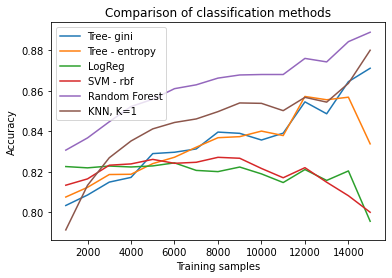

In [55]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(1000,len(df_class_random),1000)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Comparison of classification methods")

print(max(accuracy_rf))
plt.savefig("CompareClassificationMethods_Merge.png", bbox_inches="tight", dpi = 1000)

## 4f) Merged data feature importance (RF)

In [90]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

Samples drawn: 15225


edge_length_diff           0.331340
sum_angle_diff             0.272082
max_angle_diff             0.270296
total_connections_diff     0.049010
origin_connections_diff    0.040463
target_connections_diff    0.036809
dtype: float64


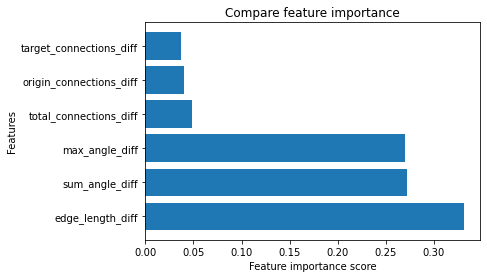

In [92]:
#1) Create Classifier
#criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
#max_depthint, default=None. The maximum depth of the tree. 

clf=RandomForestClassifier(n_estimators=100)

#2) Train 
clf.fit(X,y)

#3) Show importance
feature_names = ["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(importance)
y_pos = [i for i in range(len(importance.index))]

plt.barh(y_pos, importance);
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Compare feature importance")
plt.yticks(y_pos, importance.index);
plt.savefig("CompareFeatureImportance_Merged.png", bbox_inches="tight", dpi = 1000)

## 4g) Check anomalous edges
- KS clustering predicts L1_58 & Sn_Ct are in the same cluster
- Binary classification predicts no (which is correct)

N_observations: 202 730
KstestResult(statistic=0.8429268954292689, pvalue=4.440892098500626e-16)


Text(0.5, 1.0, 'Lift1_WayPoint58 vs Station_ChargingPoint')

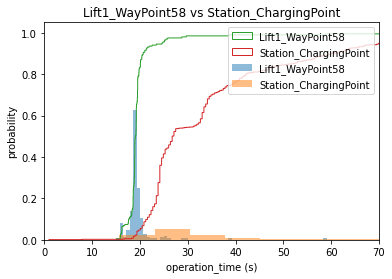

In [105]:
# 1) Select data of interest
origin = "Lift1"
target = "WayPoint58"
edge1 = origin + "_" + target
subset1 = select_data_edge(df_aaf_merge, edge1)
#independent variable to plot over
t_op1 = subset1["operation_time"] - subset1["time_to_waypoint"] 
#t_op1 = subset1["operation_time"] 

origin = "Station"
target = "ChargingPoint"
edge2 = origin + "_" + target
subset2 = select_data_edge(df_aaf_merge, edge2)
#independent variable to plot over
t_op2 = subset2["operation_time"] - subset2["time_to_waypoint"] 
#t_op2 = subset2["operation_time"] 

#Plot against actual data
precision = 2
t_start= 10**(-precision)
t_stop = ( (np.max(t_op1)) //5)*5 + 5    #round up to nearest 5 secs
t_step = 10**(-precision)
t_test = np.arange(t_start,t_stop,t_step)

#plot kde
#p_kde1 = kde(t_test, t_op1, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde1, alpha = 1)
#p_kde2 = kde(t_test, t_op2, kernel = "exponential", max_bandwidth = 5, bandwidth_precision = 0.1, cv = 10)
#plt.plot(t_test, p_kde2, alpha = 1)

#plot actual
print("N_observations:", len(subset1), len(subset2))
print(sp.stats.ks_2samp(t_op1, t_op2))
plt.hist(t_op1, density = True, bins = 100, alpha = 0.5);
plt.hist(t_op2, density = True, bins = 100, alpha = 0.5);

plt.hist(t_op1, bins = 2000, density=True, histtype='step',cumulative=True)
plt.hist(t_op2, bins = 2000, density=True, histtype='step',cumulative=True)

plt.legend([edge1, edge2, edge1, edge2])
plt.xlabel("operation_time (s)")
plt.ylabel("probability")
plt.xlim([0,70])
plt.title(edge1 + " vs " + edge2)


In [110]:
df_class_random.head(2)

,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
0,WayPoint49_Cafeteria,WayPoint89_Lift3,0,3.9331,3,1,4,0.134242,0.473631
1,WayPoint60_WayPoint43,Seminarraum_WayPoint39,0,2.55858,1,1,0,1.54891,3.09846


In [125]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

clf_rf = RandomForestClassifier(n_estimators=100)

df_class_random = df_class_random[df_class_random["edge1"] != "Station_ChargingPoint"]
df_class_random = df_class_random[df_class_random["edge1"] != "Lift1_WayPoint58"]
df_class_random = df_class_random[df_class_random["edge2"] != "Station_ChargingPoint"]
df_class_random = df_class_random[df_class_random["edge2"] != "Lift1_WayPoint58"]
df_class_random = df_class_random.reset_index(drop = True)

test = df_class_diff[df_class_diff["edge2"] == "Lift1_WayPoint58"]
test = test[test["edge1"] == "Station_ChargingPoint"]

y = np.array(df_class_random["same_cluster"])

y_test = np.array(df_class_random["same_cluster"])
y_test = y_test[n_train:]
y = y.astype(float)
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])


X_test = np.array(test[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])

clf_rf = clf_rf.fit(X,y)

y_pred_rf = clf_rf.predict(X_test)
print(y_pred_rf)

Samples drawn: 15225
[0.]


In [134]:
ks_matrix3_df = pd.DataFrame(ks_matrix3)
ks_matrix3_df.head()
unique = []
unique_edges = []
threshold = 0.5
for i in range(len(ks_matrix3_df)):
    if i < 5:
        print(i,ks_matrix3_df[i].min())
    if ks_matrix3_df[i].min()>threshold:
        unique.append(i)
        unique_edges.append(ks_edges3[i])
print(unique)
print(unique_edges)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
[]
[]


# 5) Dendrograms for clustering

In [164]:
condensed3 = sp.spatial.distance.pdist(ks_matrix3)
len(condensed3)

15225

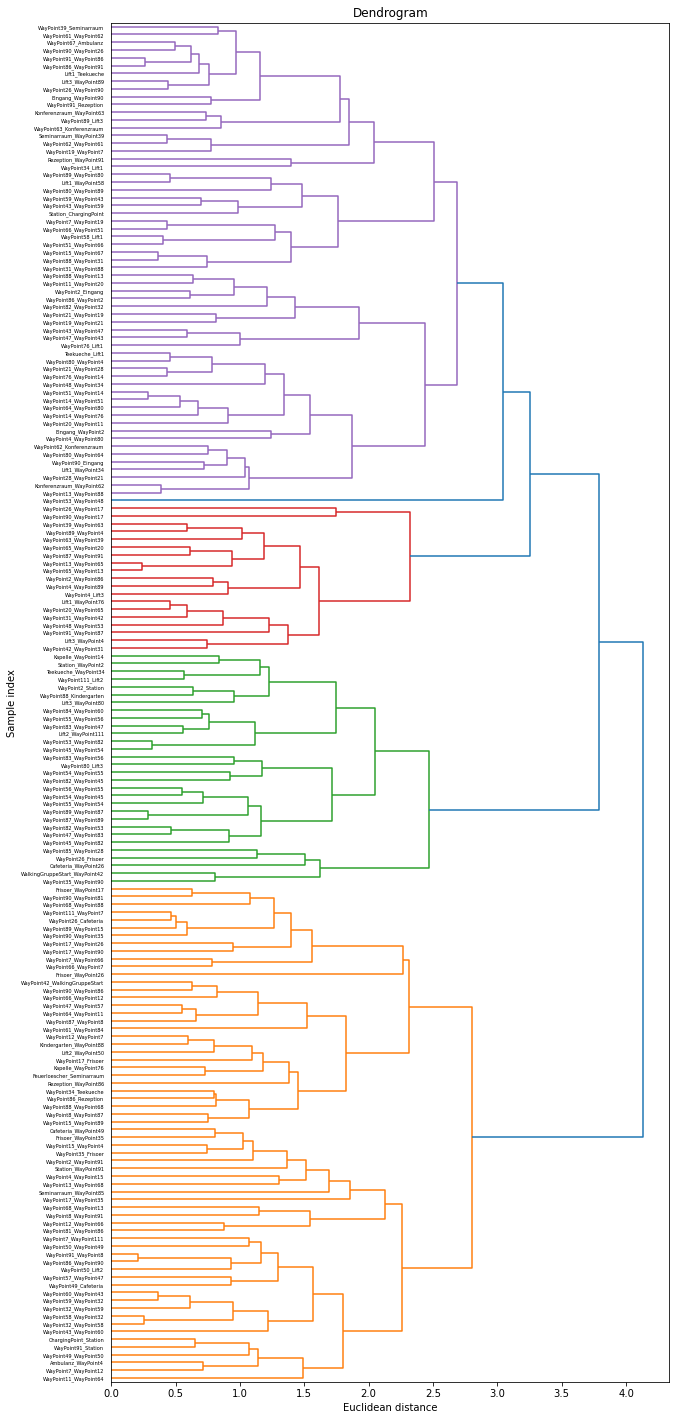

In [175]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(10, 25))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(condensed3, method='average'), labels = ks_edges3,orientation='right')

plt.title('Dendrogram')
plt.ylabel('Sample index')
plt.xlabel('Euclidean distance')
plt.savefig("dendrogram_aafmerge.pdf", dpi = 1000)

# 6) Different HAC metrics (AAF)
- see section 4e/f for "average"

## 6a) Average

In [393]:
clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = "average")
labels = clustering.fit_predict( ks_matrix3 )
print(labels)
ks_clusters3 = pd.DataFrame(index = np.arange(len(ks_edges3)),columns = ["edge_id", "cluster_id"])
ks_clusters3["edge_id"] = ks_edges3
ks_clusters3["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 3 3 3 2 2 5 2 2 2 6 6 3 2 3 0 3 2 2 2 6 5 2 2 3 2 2 2 2 6 2 3 3 2 6 6 6
 2 1 6 2 1 2 2 1 2 1 6 6 5 2 2 5 2 3 6 6 1 6 4 2 2 2 2 2 4 2 6 1 4 2 0 2 1
 2 6 0 6 0 1 2 2 1 1 4 1 1 2 1 1 5 0 0 3 2 2 1 2 5 1 3 3 3 2 3 0 2 3 3 3 5
 3 2 2 3 5 6 1 2 5 3 3 5 6 6 2 2 1 2 1 6 5 5 6 4 5 6 5 3 3 5 2 2 1 2 1 3 3
 3 2 5 3 3 1 1 2 6 2 6 6 2 3 2 1 2 2 4 2 5 1 1 5 4 2 6]
7 clusters


In [394]:
df_class_diff = dataloader6(ks_clusters3, filename = "aaf_map.yaml")
df_class_diff.tail()

Time taken (dataloader6): 19.524195194244385 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
15220,Eingang_WayPoint90,WayPoint66_WayPoint12,0,1.68014,0,4,4,1.86662,7.72501
15221,Eingang_WayPoint90,WayPoint26_WayPoint17,0,1.32257,1,2,1,0.194467,3.41486
15222,WayPoint31_WayPoint88,WayPoint66_WayPoint12,0,5.93347,1,2,1,1.12627,4.93573
15223,WayPoint31_WayPoint88,WayPoint26_WayPoint17,0,5.5759,2,0,2,0.545879,0.625579
15224,WayPoint66_WayPoint12,WayPoint26_WayPoint17,0,0.357572,1,2,3,1.67215,4.31015


Samples drawn: 6220
1000 datapoints: 2.59240984916687 secs
2000 datapoints: 5.606895923614502 secs
3000 datapoints: 9.540144681930542 secs
4000 datapoints: 14.13057827949524 secs
5000 datapoints: 19.118701696395874 secs
Time taken: 19.118701696395874 secs
0.8873770491803278


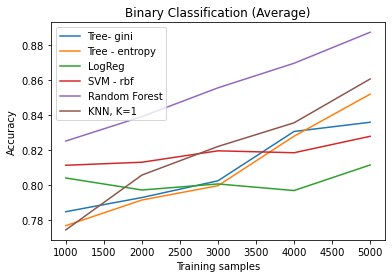

In [396]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = True)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(1000,len(df_class_random)*9//10,1000)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Binary Classification (Average)")

print(max(accuracy_rf))
plt.savefig("TrainAAF_TestAAF_Balanced.png", bbox_inches="tight", dpi = 1000)

Samples drawn: 15225
edge_length_diff           0.500710
max_angle_diff             0.192921
sum_angle_diff             0.185252
total_connections_diff     0.048796
origin_connections_diff    0.040872
target_connections_diff    0.031450
dtype: float64


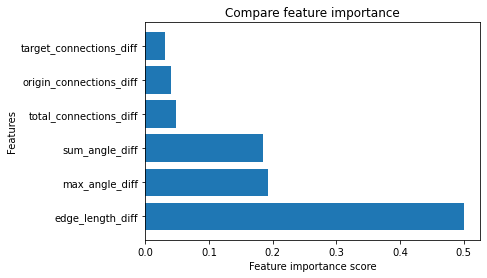

In [397]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#class labels
n_train = 10000
y = np.array(df_class_random["same_cluster"])
y = y[0:n_train]
y_test = np.array(df_class_random["same_cluster"])
y_test = y_test[n_train:]
y = y.astype(float)
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][0:n_train])

X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])
    

#1) Create Classifier
#criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
#max_depthint, default=None. The maximum depth of the tree. 

clf=RandomForestClassifier(n_estimators=100)

#2) Train 
clf.fit(X,y)

#3) Show importance
feature_names = ["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(importance)
y_pos = [i for i in range(len(importance.index))]

plt.barh(y_pos, importance);
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Compare feature importance")
plt.yticks(y_pos, importance.index);
plt.savefig("FeatureImportance_AAF_Balanced.png", bbox_inches="tight", dpi = 1000)

## 6b) Single

In [248]:
clustering = AgglomerativeClustering(n_clusters=15, affinity='precomputed', linkage = "single")
labels = clustering.fit_predict( ks_matrix3 )
print(labels)
ks_clusters3 = pd.DataFrame(index = np.arange(len(ks_edges3)),columns = ["edge_id", "cluster_id"])
ks_clusters3["edge_id"] = ks_edges3
ks_clusters3["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  9  0  0  0  0  0 12  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  6  0  0  6  0  6  0
  0 12  0  0 12  0  0  0  0  6  0 14  0  0  0  0  0 14  0  0  6  1  0 11
  0  6  0  0 10  0  7  6  0  0  6  6  1  6  6  0  6  6  5  8 10  0  0  0
  6  0 12  6  0  0  0  0  0 12  0  0  0  0  2  0  0  0  0  3  0  6  0  5
  0  0  5  0  0  0  0  6  0  6  0  2 12  0  4 12  0 12  0  0 12  0  0  6
  0  6  0  0  0  0 12  0  0  6  6  0  0  0  0  0  0  0  0  6  0  0  4  0
 12  6  6 12 13  0  0]
15 clusters


In [249]:
df_class_diff = dataloader6(ks_clusters3, filename = "aaf_map.yaml")
df_class_diff.tail()

Time taken (dataloader6): 19.46853518486023 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
15220,Eingang_WayPoint90,WayPoint66_WayPoint12,0,1.68014,0,4,4,1.86662,7.72501
15221,Eingang_WayPoint90,WayPoint26_WayPoint17,0,1.32257,1,2,1,0.194467,3.41486
15222,WayPoint31_WayPoint88,WayPoint66_WayPoint12,0,5.93347,1,2,1,1.12627,4.93573
15223,WayPoint31_WayPoint88,WayPoint26_WayPoint17,0,5.5759,2,0,2,0.545879,0.625579
15224,WayPoint66_WayPoint12,WayPoint26_WayPoint17,1,0.357572,1,2,3,1.67215,4.31015


Samples drawn: 15225
1000 datapoints: 4.174913644790649 secs
2000 datapoints: 8.940252542495728 secs
3000 datapoints: 14.68177580833435 secs
4000 datapoints: 21.98684549331665 secs
5000 datapoints: 31.2413547039032 secs
6000 datapoints: 41.38681888580322 secs
7000 datapoints: 53.514450788497925 secs
8000 datapoints: 66.83340191841125 secs
9000 datapoints: 84.11734318733215 secs
10000 datapoints: 103.30146288871765 secs
11000 datapoints: 122.84922623634338 secs
12000 datapoints: 144.0389847755432 secs
13000 datapoints: 166.0994369983673 secs
Time taken: 166.0994369983673 secs
0.8853033707865169


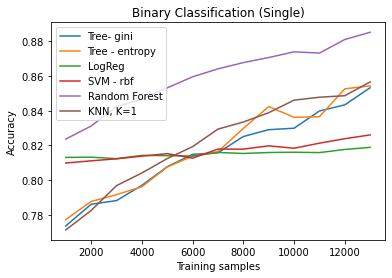

In [215]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(1000,len(df_class_random)*9//10,1000)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Binary Classification (Single)")

print(max(accuracy_rf))
plt.savefig("CompareClassification_MergeSINGLE.png", bbox_inches="tight", dpi = 1000)

Samples drawn: 15225
edge_length_diff           0.610937
sum_angle_diff             0.149643
max_angle_diff             0.149503
total_connections_diff     0.036598
origin_connections_diff    0.028052
target_connections_diff    0.025267
dtype: float64


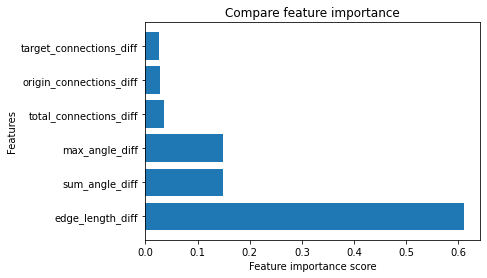

In [250]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#class labels
n_train = 10000
y = np.array(df_class_random["same_cluster"])
y = y[0:n_train]
y_test = np.array(df_class_random["same_cluster"])
y_test = y_test[n_train:]
y = y.astype(float)
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][0:n_train])

X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])
    

#1) Create Classifier
#criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
#max_depthint, default=None. The maximum depth of the tree. 

clf=RandomForestClassifier(n_estimators=100)

#2) Train 
clf.fit(X,y)

#3) Show importance
feature_names = ["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(importance)
y_pos = [i for i in range(len(importance.index))]

plt.barh(y_pos, importance);
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Compare feature importance")
plt.yticks(y_pos, importance.index);
plt.savefig("CompareFeatureImportance_SINGLE.png", bbox_inches="tight", dpi = 1000)

## 6c) Complete

In [251]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage = "complete")
labels = clustering.fit_predict( ks_matrix3 )
print(labels)
ks_clusters3 = pd.DataFrame(index = np.arange(len(ks_edges3)),columns = ["edge_id", "cluster_id"])
ks_clusters3["edge_id"] = ks_edges3
ks_clusters3["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 1 1 1 2 2 4 2 2 2 3 3 1 2 1 0 1 2 2 2 3 4 2 2 1 2 2 2 2 3 2 1 1 2 3 3 3
 2 3 3 2 4 2 2 4 2 4 3 3 4 2 2 4 2 1 3 3 4 3 0 2 2 2 2 2 0 2 3 4 0 2 0 2 4
 2 3 0 3 0 3 2 2 3 3 0 4 3 2 4 4 4 0 0 1 2 2 4 2 4 4 1 1 1 2 1 0 2 1 1 1 0
 1 2 2 1 0 3 4 2 4 1 1 4 3 3 2 2 4 2 4 3 0 4 3 0 4 3 4 1 1 4 2 2 4 2 4 1 1
 1 2 4 1 1 3 4 2 3 2 3 3 2 1 2 4 2 2 0 2 4 3 3 4 0 2 3]
5 clusters


In [252]:
df_class_diff = dataloader6(ks_clusters3, filename = "aaf_map.yaml")
df_class_diff.tail()

Time taken (dataloader6): 19.79167127609253 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
15220,Eingang_WayPoint90,WayPoint66_WayPoint12,0,1.68014,0,4,4,1.86662,7.72501
15221,Eingang_WayPoint90,WayPoint26_WayPoint17,0,1.32257,1,2,1,0.194467,3.41486
15222,WayPoint31_WayPoint88,WayPoint66_WayPoint12,0,5.93347,1,2,1,1.12627,4.93573
15223,WayPoint31_WayPoint88,WayPoint26_WayPoint17,0,5.5759,2,0,2,0.545879,0.625579
15224,WayPoint66_WayPoint12,WayPoint26_WayPoint17,0,0.357572,1,2,3,1.67215,4.31015


Samples drawn: 15225
1000 datapoints: 4.570420980453491 secs
2000 datapoints: 10.3326735496521 secs
3000 datapoints: 17.914623975753784 secs
4000 datapoints: 25.590195178985596 secs
5000 datapoints: 35.088045835494995 secs
6000 datapoints: 45.11360812187195 secs
7000 datapoints: 56.758634090423584 secs
8000 datapoints: 70.49789309501648 secs
9000 datapoints: 85.92073583602905 secs
10000 datapoints: 103.5034990310669 secs
11000 datapoints: 122.67766952514648 secs
12000 datapoints: 142.82130193710327 secs
13000 datapoints: 165.1930434703827 secs
Time taken: 165.1930434703827 secs
0.8648994082840236


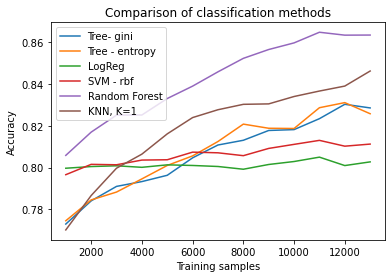

In [205]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(1000,len(df_class_random)*9//10,1000)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Binary Classification (Complete)")

print(max(accuracy_rf))
plt.savefig("CompareClassification_MergeCOMPLETE.png", bbox_inches="tight", dpi = 1000)

Samples drawn: 15225
edge_length_diff           0.502275
sum_angle_diff             0.191284
max_angle_diff             0.191044
total_connections_diff     0.047122
origin_connections_diff    0.035720
target_connections_diff    0.032554
dtype: float64


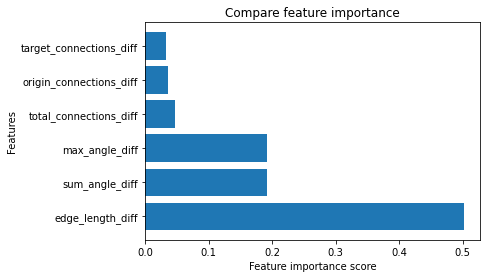

In [253]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#class labels
n_train = 10000
y = np.array(df_class_random["same_cluster"])
y = y[0:n_train]
y_test = np.array(df_class_random["same_cluster"])
y_test = y_test[n_train:]
y = y.astype(float)
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][0:n_train])

X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])
    

#1) Create Classifier
#criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
#max_depthint, default=None. The maximum depth of the tree. 

clf=RandomForestClassifier(n_estimators=100)

#2) Train 
clf.fit(X,y)

#3) Show importance
feature_names = ["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(importance)
y_pos = [i for i in range(len(importance.index))]

plt.barh(y_pos, importance);
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Compare feature importance")
plt.yticks(y_pos, importance.index);
plt.savefig("CompareFeatureImportance_COMPLETE.png", bbox_inches="tight", dpi = 1000)

# 7) TSC Ground Truth

In [353]:
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)
df_tsc_merge.tail(2)

,origin,target,edge_id,time_to_waypoint,operation_time
17977,SuppLocker13,SuppLocker1,SuppLocker13_SuppLocker1,0.139581,14.848109
17978,HospEmptySpace,HospActRec2,HospEmptySpace_HospActRec2,0.055865,5.241324


In [392]:
ks_matrix_tsc, ks_edges_tsc = distances_ks(df_tsc_merge, metric = "difference", cutoff = 20)

0 edges: 0.04792904853820801 secs
10 edges: 6.559035062789917 secs
20 edges: 11.308516502380371 secs
30 edges: 16.417540073394775 secs
40 edges: 20.651430130004883 secs
50 edges: 24.75274419784546 secs
60 edges: 28.604843616485596 secs
70 edges: 32.38697671890259 secs
80 edges: 36.23407030105591 secs
90 edges: 39.89475893974304 secs
100 edges: 43.50796437263489 secs
110 edges: 47.1670355796814 secs
120 edges: 50.81550431251526 secs
130 edges: 54.43599224090576 secs
140 edges: 58.14486074447632 secs
150 edges: 61.88288116455078 secs
160 edges: 65.30064058303833 secs
170 edges: 69.36993455886841 secs
180 edges: 73.37524437904358 secs
190 edges: 77.35214638710022 secs
200 edges: 79.72275114059448 secs
210 edges: 79.72974395751953 secs
220 edges: 79.73671364784241 secs
230 edges: 79.74469232559204 secs
240 edges: 79.75264954566956 secs
Time taken: 79.75965428352356 secs


## 7a) TSC Average Linkage

Optimum no. of clusters: 2
Max silhouette coeff: 0.2565309461232854


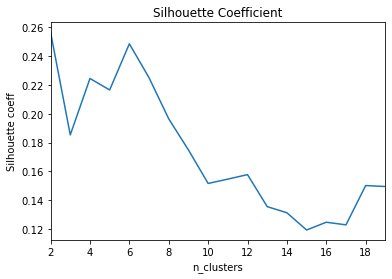

In [398]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [399]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix_tsc )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 1 2 2 2 2 2 5 1 2 1 2 1 4 1 4 1 1 2 1 2 2 2 1 2 2 0 2 2 2 2 3 3 0 3 2 0
 1 0 3 0 0 2 0 2 2 1 2 0 2 0 2 1 2 1 4 4 4 1 0 3 0 0 4 1 0 2 0 0 0 4 2 4 4
 2 0 0 1 2 1 1 4 2 1 1 1 0 3 2 1 1 3 4 2 4 0 2 2 2 2 2 2 4 2 2 3 1 2 1 4 2
 1 1 1 0 2 2 0 1 5 1 2 2 1 0 1 2 1 1 1 1 2 1 3 0 3 0 1 1 1 2 2 2 1 2 1 2 0
 2 2 1 0 2 1 2 0 0 1 0 2 1 1 2 2 2 2 0 1 0 0 2 0 1 2 0 1 1 1 1 1 2 3 3 0 2
 2 4 2 2 0 3 2 2 1 2 2]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


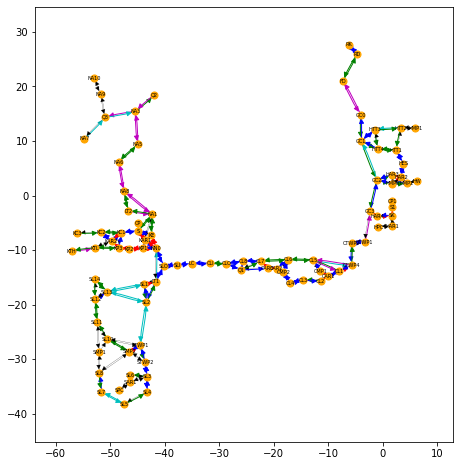

In [400]:
G = draw_clusters_tsc("tsc_map.yaml", ks_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_ks_tsc_6AVERAGE.png", dpi = 1000, bbox_inches = "tight")

In [401]:
df_class_diff = dataloader6(ks_clusters_tsc, filename = "tsc_map.yaml")
df_class_diff.tail(2)

Time taken (dataloader6): 23.86515736579895 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
19105,HospTriangularTable3_GlassCorridor1,SuppLocker4_SuppLocker3,1,0.418536,1,0,1,1.14269,2.01749
19106,HospTriangularTable3_GlassCorridor1,CorpLocker6_CorpActRec2,1,0.548828,1,1,0,0.499291,0.452477
19107,KitchenTableLow_KitchenTableHigh,SuppLocker4_SuppLocker3,0,1.51036,1,3,2,3.01771,5.95144
19108,KitchenTableLow_KitchenTableHigh,CorpLocker6_CorpActRec2,0,1.64065,1,2,3,2.37432,3.48147
19109,SuppLocker4_SuppLocker3,CorpLocker6_CorpActRec2,1,0.130292,2,1,1,0.643397,2.46997


Samples drawn: 9952
1000 datapoints: 3.601984977722168 secs
2000 datapoints: 8.177124738693237 secs
3000 datapoints: 14.099578619003296 secs
4000 datapoints: 21.215919733047485 secs
5000 datapoints: 29.78707003593445 secs
6000 datapoints: 40.11446523666382 secs
7000 datapoints: 51.83649277687073 secs
8000 datapoints: 65.8016984462738 secs
Time taken: 65.8016984462738 secs
0.7602459016393442


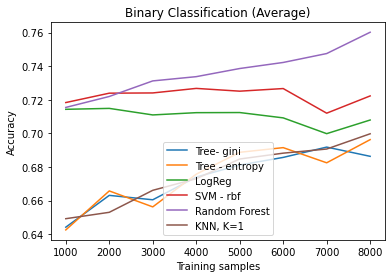

In [406]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = True)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(1000,len(df_class_random)*9//10,1000)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random["same_cluster"])
    y = y[0:n_train]
    y_test = np.array(df_class_random["same_cluster"])
    y_test = y_test[n_train:]
    y = y.astype(float)
    y_test = y_test.astype(float)

    #attributes
    X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][n_train:])
    
    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Binary Classification (Average)")

print(max(accuracy_rf))
plt.savefig("TrainTSC_TestTSC_Balanced.png", bbox_inches="tight", dpi = 1000)

Samples drawn: 19110
edge_length_diff           0.429282
sum_angle_diff             0.232936
max_angle_diff             0.232710
total_connections_diff     0.041678
origin_connections_diff    0.032859
target_connections_diff    0.030536
dtype: float64


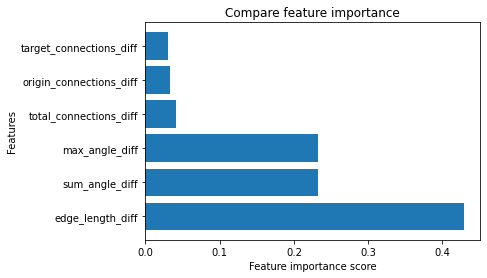

In [407]:
#1) Get dataset into correct format
df_class_random = dataloader_random(df_class_diff, balanced = False)

#class labels
n_train = 7000
y = np.array(df_class_random["same_cluster"])
y = y[0:n_train]
y_test = np.array(df_class_random["same_cluster"])
y_test = y_test[n_train:]
y = y.astype(float)
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][0:n_train])

X_test = np.array(df_class_random[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])
    

#1) Create Classifier
#criterion{“gini”, “entropy”}, default=”gini”. The function to measure the quality of a split.
#max_depthint, default=None. The maximum depth of the tree. 

clf=RandomForestClassifier(n_estimators=100)

#2) Train 
clf.fit(X,y)

#3) Show importance
feature_names = ["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]
importance = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(importance)
y_pos = [i for i in range(len(importance.index))]

plt.barh(y_pos, importance);
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Compare feature importance")
plt.yticks(y_pos, importance.index);
plt.savefig("FeatureImportance_TSC_Balanced.png", bbox_inches="tight", dpi = 1000)

## 7b) TSC Single Linkage

Optimum no. of clusters: 2
Max silhouette coeff: 0.11076987570049238


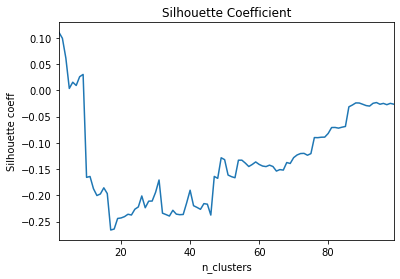

In [288]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc, max_clusters = 100, method = "ss", linkage = "single")

## 7c) TSC Complete Linkage

Optimum no. of clusters: 2
Max silhouette coeff: 0.28221797280035277


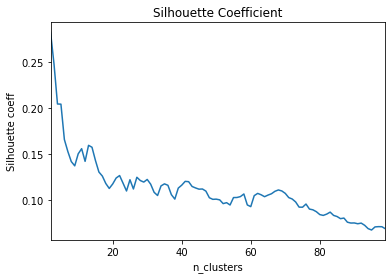

In [305]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc, max_clusters = 100, method = "ss", linkage = "complete")

## 7d) Use operation_time only

In [291]:
ks_matrix_tsc1, ks_edges_tsc1 = distances_ks(df_tsc_merge, metric = "operation_time", cutoff = 20)

0 edges: 0.037899017333984375 secs
10 edges: 6.080165386199951 secs
20 edges: 10.763132095336914 secs
30 edges: 15.079768896102905 secs
40 edges: 19.08766198158264 secs
50 edges: 22.889334440231323 secs
60 edges: 26.380711555480957 secs
70 edges: 29.788308143615723 secs
80 edges: 33.1588237285614 secs
90 edges: 36.44523739814758 secs
100 edges: 39.74961280822754 secs
110 edges: 42.93562936782837 secs
120 edges: 46.11712718009949 secs
130 edges: 49.428306102752686 secs
140 edges: 52.57238984107971 secs
150 edges: 55.72709107398987 secs
160 edges: 58.770723819732666 secs
170 edges: 61.792115211486816 secs
180 edges: 64.84103560447693 secs
190 edges: 68.27389597892761 secs
200 edges: 70.12959742546082 secs
210 edges: 70.13657879829407 secs
220 edges: 70.14356017112732 secs
230 edges: 70.14954423904419 secs
240 edges: 70.15652561187744 secs
Time taken: 70.16151213645935 secs


Optimum no. of clusters: 7
Max CH index: 37.9879780874977


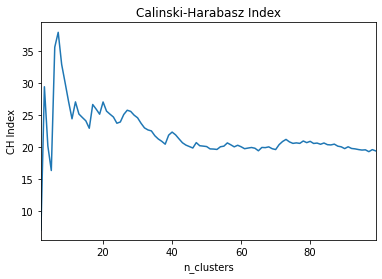

In [296]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc1, max_clusters = 100, method = "ch", linkage = "average")

Optimum no. of clusters: 2
Max silhouette coeff: 0.2236955243973526


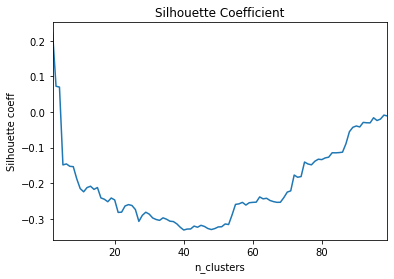

In [300]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc1, max_clusters = 100, method = "ss", linkage = "single")

Optimum no. of clusters: 2
Max silhouette coeff: 0.2625025608645565


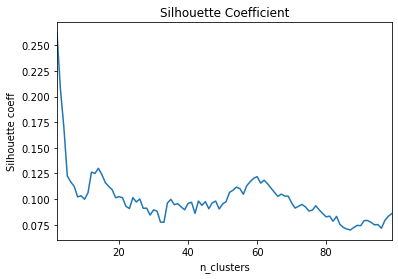

In [304]:
n_clusters, s_list = optimum_clusters(ks_matrix_tsc1, max_clusters = 100, method = "ss", linkage = "complete")

# 8) Train on AAF, Test on TSC

## 8a) Load AAF data

In [408]:
clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage = "average")
labels = clustering.fit_predict( ks_matrix3 )
print(labels)
ks_clusters3 = pd.DataFrame(index = np.arange(len(ks_edges3)),columns = ["edge_id", "cluster_id"])
ks_clusters3["edge_id"] = ks_edges3
ks_clusters3["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[2 3 3 3 2 2 5 2 2 2 6 6 3 2 3 0 3 2 2 2 6 5 2 2 3 2 2 2 2 6 2 3 3 2 6 6 6
 2 1 6 2 1 2 2 1 2 1 6 6 5 2 2 5 2 3 6 6 1 6 4 2 2 2 2 2 4 2 6 1 4 2 0 2 1
 2 6 0 6 0 1 2 2 1 1 4 1 1 2 1 1 5 0 0 3 2 2 1 2 5 1 3 3 3 2 3 0 2 3 3 3 5
 3 2 2 3 5 6 1 2 5 3 3 5 6 6 2 2 1 2 1 6 5 5 6 4 5 6 5 3 3 5 2 2 1 2 1 3 3
 3 2 5 3 3 1 1 2 6 2 6 6 2 3 2 1 2 2 4 2 5 1 1 5 4 2 6]
7 clusters


In [409]:
df_class_diff_aaf = dataloader6(ks_clusters3, filename = "aaf_map.yaml")
df_class_diff_aaf.tail(2)

Time taken (dataloader6): 18.57123637199402 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
15223,WayPoint31_WayPoint88,WayPoint26_WayPoint17,0,5.5759,2,0,2,0.545879,0.625579
15224,WayPoint66_WayPoint12,WayPoint26_WayPoint17,0,0.357572,1,2,3,1.67215,4.31015


## 8b) Load TSC data

In [410]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( ks_matrix_tsc )
print(labels)
ks_clusters_tsc = pd.DataFrame(index = np.arange(len(ks_edges_tsc)),columns = ["edge_id", "cluster_id"])
ks_clusters_tsc["edge_id"] = ks_edges_tsc
ks_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[3 1 2 2 2 2 2 5 1 2 1 2 1 4 1 4 1 1 2 1 2 2 2 1 2 2 0 2 2 2 2 3 3 0 3 2 0
 1 0 3 0 0 2 0 2 2 1 2 0 2 0 2 1 2 1 4 4 4 1 0 3 0 0 4 1 0 2 0 0 0 4 2 4 4
 2 0 0 1 2 1 1 4 2 1 1 1 0 3 2 1 1 3 4 2 4 0 2 2 2 2 2 2 4 2 2 3 1 2 1 4 2
 1 1 1 0 2 2 0 1 5 1 2 2 1 0 1 2 1 1 1 1 2 1 3 0 3 0 1 1 1 2 2 2 1 2 1 2 0
 2 2 1 0 2 1 2 0 0 1 0 2 1 1 2 2 2 2 0 1 0 0 2 0 1 2 0 1 1 1 1 1 2 3 3 0 2
 2 4 2 2 0 3 2 2 1 2 2]
6 clusters


In [411]:
df_class_diff_tsc = dataloader6(ks_clusters_tsc, filename = "tsc_map.yaml")
df_class_diff_tsc.tail(2)

Time taken (dataloader6): 25.578325271606445 secs


,edge1,edge2,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
19108,KitchenTableLow_KitchenTableHigh,CorpLocker6_CorpActRec2,0,1.64065,1,2,3,2.37432,3.48147
19109,SuppLocker4_SuppLocker3,CorpLocker6_CorpActRec2,1,0.130292,2,1,1,0.643397,2.46997


## 8c) Point test

In [416]:
# Unbalanced dataset

#1) Get dataset into correct format
df_class_random_aaf = dataloader_random(df_class_diff_aaf, balanced = True)
df_class_random_tsc = dataloader_random(df_class_diff_tsc, balanced = False)

#2) Train classifier

clf_rf = RandomForestClassifier(n_estimators=100)

#class labels
y = np.array(df_class_random_aaf["same_cluster"])
y = y
y = y.astype(float)

y_test = np.array(df_class_random_tsc["same_cluster"])
y_test = y_test
y_test = y_test.astype(float)

#attributes
X = np.array(df_class_random_aaf[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])

X_test = np.array(df_class_random_tsc[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])
    

clf_rf = clf_rf.fit(X,y)


#5) Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred_rf)
print("Accuracy:", accuracy)

print(sklearn.metrics.classification_report(y_test,y_pred_rf))

Samples drawn: 6220
Samples drawn: 19110
Accuracy: 0.633490319204605
              precision    recall  f1-score   support

         0.0       0.90      0.57      0.70     14134
         1.0       0.40      0.82      0.54      4976

    accuracy                           0.63     19110
   macro avg       0.65      0.70      0.62     19110
weighted avg       0.77      0.63      0.65     19110



## 8d) Compare all classifiers

Samples drawn: 6220
Samples drawn: 9952
500 datapoints: 3.4983465671539307 secs
1000 datapoints: 7.496922731399536 secs
1500 datapoints: 11.572484254837036 secs
2000 datapoints: 16.0754816532135 secs
2500 datapoints: 21.94784688949585 secs
3000 datapoints: 27.60798978805542 secs
3500 datapoints: 33.900537729263306 secs
4000 datapoints: 40.65103459358215 secs
4500 datapoints: 48.25120162963867 secs
5000 datapoints: 57.14033102989197 secs
5500 datapoints: 67.69592881202698 secs
6000 datapoints: 78.92113614082336 secs
Time taken: 78.92210459709167 secs
0.7086213826366559


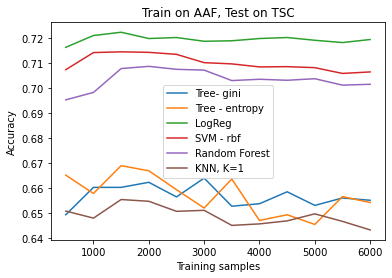

In [436]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random_aaf = dataloader_random(df_class_diff_aaf, balanced = True)
df_class_random_tsc = dataloader_random(df_class_diff_tsc, balanced = True)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(500,len(df_class_random_aaf),500)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []

y_test = np.array(df_class_random_tsc["same_cluster"])
y_test = y_test
y_test = y_test.astype(float)

X_test = np.array(df_class_random_tsc[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random_aaf["same_cluster"])
    y = y[0:n_train]
    y = y.astype(float)

    #attributes
    X = np.array(df_class_random_aaf[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Train on AAF, Test on TSC")

print(max(accuracy_rf))
plt.savefig("TrainAAF_TestTSC_Balanced.png", bbox_inches="tight", dpi = 1000)

## 8e) Compare classifiers trained on AAF vs TSC
- both tested on TSC

Samples drawn: 6220
Samples drawn: 9952
500 datapoints: 3.579087972640991 secs
1000 datapoints: 8.048392295837402 secs
1500 datapoints: 13.545517683029175 secs
2000 datapoints: 19.84857726097107 secs
2500 datapoints: 27.20179271697998 secs
3000 datapoints: 37.07991170883179 secs
3500 datapoints: 47.62495279312134 secs
4000 datapoints: 58.53180766105652 secs
4500 datapoints: 70.92225766181946 secs
5000 datapoints: 84.6333634853363 secs
5500 datapoints: 99.56755781173706 secs
6000 datapoints: 116.6672728061676 secs
Time taken: 116.6672728061676 secs
0.7086213826366559


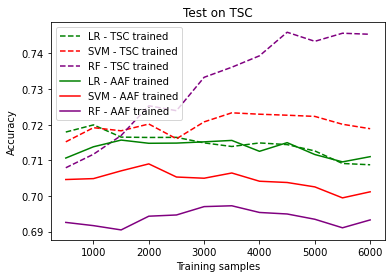

In [437]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random_aaf = dataloader_random(df_class_diff_aaf, balanced = True)
df_class_random_tsc = dataloader_random(df_class_diff_tsc, balanced = True)

#2) Train classifier
clf_lr_tsc = LogisticRegression(random_state=0)
clf_svm_tsc = svm.SVC(kernel='rbf') 
clf_rf_tsc = RandomForestClassifier(n_estimators=100)
clf_lr_aaf = LogisticRegression(random_state=0)
clf_svm_aaf = svm.SVC(kernel='rbf') 
clf_rf_aaf = RandomForestClassifier(n_estimators=100)

#3) select data for train & test
n_train_max = min(len(df_class_random_aaf), len(df_class_random_tsc))
n_train_range = np.arange(500,n_train_max,500)
n_iter = 5

accuracy_lr_tsc = []
accuracy_svm_tsc = []
accuracy_rf_tsc = []
accuracy_lr_aaf = []
accuracy_svm_aaf = []
accuracy_rf_aaf = []




for n_train in n_train_range:
    #class labels
    y_tsc = np.array(df_class_random_tsc["same_cluster"])
    y_tsc = y_tsc[0:n_train]
    y_tsc = y_tsc.astype(float)
    
    y_aaf = np.array(df_class_random_aaf["same_cluster"])
    y_aaf = y_aaf[0:n_train]
    y_aaf = y_aaf.astype(float)
    
    y_test = np.array(df_class_random_tsc["same_cluster"])
    y_test = y_test[n_train:]
    y_test = y_test.astype(float)

    #attributes
    X_tsc = np.array(df_class_random_tsc[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])
    X_aaf = np.array(df_class_random_aaf[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])
    
    X_test = np.array(df_class_random_tsc[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])


    mean_lr_tsc = 0
    mean_svm_tsc = 0
    mean_rf_tsc = 0
    mean_lr_aaf = 0
    mean_svm_aaf = 0
    mean_rf_aaf = 0

    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_lr_tsc = clf_lr_tsc.fit(X_tsc,y_tsc)
        clf_svm_tsc = clf_svm_tsc.fit(X_tsc,y_tsc)
        clf_rf_tsc = clf_rf_tsc.fit(X_tsc,y_tsc)
        clf_lr_aaf = clf_lr_aaf.fit(X_aaf,y_aaf)
        clf_svm_aaf = clf_svm_aaf.fit(X_aaf,y_aaf)
        clf_rf_aaf = clf_rf_aaf.fit(X_aaf,y_aaf)

        #5) Predict the response for test dataset
        y_pred_lr_tsc = clf_lr_tsc.predict(X_test)
        y_pred_svm_tsc = clf_svm_tsc.predict(X_test)
        y_pred_rf_tsc = clf_rf_tsc.predict(X_test)
        y_pred_lr_aaf = clf_lr_aaf.predict(X_test)
        y_pred_svm_aaf = clf_svm_aaf.predict(X_test)
        y_pred_rf_aaf = clf_rf_aaf.predict(X_test)


        #6) Evaluate model
        mean_lr_tsc += sklearn.metrics.accuracy_score(y_test, y_pred_lr_tsc)
        mean_svm_tsc += sklearn.metrics.accuracy_score(y_test, y_pred_svm_tsc)
        mean_rf_tsc += sklearn.metrics.accuracy_score(y_test,y_pred_rf_tsc)
        mean_lr_aaf += sklearn.metrics.accuracy_score(y_test, y_pred_lr_aaf)
        mean_svm_aaf += sklearn.metrics.accuracy_score(y_test, y_pred_svm_aaf)
        mean_rf_aaf += sklearn.metrics.accuracy_score(y_test,y_pred_rf_aaf)

    
    #7) take average
    accuracy_lr_tsc.append(mean_lr_tsc/n_iter)
    accuracy_svm_tsc.append(mean_svm_tsc/n_iter)
    accuracy_rf_tsc.append(mean_rf_tsc/n_iter)
    accuracy_lr_aaf.append(mean_lr_aaf/n_iter)
    accuracy_svm_aaf.append(mean_svm_aaf/n_iter)
    accuracy_rf_aaf.append(mean_rf_aaf/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_lr_tsc, color = "green", linestyle = "dashed")
plt.plot(n_train_range, accuracy_svm_tsc, color = "red", linestyle = "dashed")
plt.plot(n_train_range, accuracy_rf_tsc, color = "purple", linestyle = "dashed")
plt.plot(n_train_range, accuracy_lr_aaf, color = "green")
plt.plot(n_train_range, accuracy_svm_aaf, color = "red")
plt.plot(n_train_range, accuracy_rf_aaf, color = "purple")
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["LR - TSC trained", "SVM - TSC trained", "RF - TSC trained",
           "LR - AAF trained", "SVM - AAF trained", "RF - AAF trained"])
plt.title("Test on TSC")

print(max(accuracy_rf))
plt.savefig("TrainTSCAAF_TestTSC_Balanced.png", bbox_inches="tight", dpi = 1000)

# 9) Train on TSC, Test on AAF

## 9a Compare All Classifiers

Samples drawn: 6220
Samples drawn: 9952
500 datapoints: 2.1070313453674316 secs
1000 datapoints: 4.9216649532318115 secs
1500 datapoints: 8.328551769256592 secs
2000 datapoints: 12.167486906051636 secs
2500 datapoints: 16.564478158950806 secs
3000 datapoints: 21.717818021774292 secs
3500 datapoints: 27.506661653518677 secs
4000 datapoints: 34.583256006240845 secs
4500 datapoints: 42.10071682929993 secs
5000 datapoints: 50.31370806694031 secs
5500 datapoints: 59.61343717575073 secs
6000 datapoints: 69.94061064720154 secs
6500 datapoints: 81.22852492332458 secs
7000 datapoints: 93.98256301879883 secs
7500 datapoints: 109.24854445457458 secs
8000 datapoints: 126.09398746490479 secs
8500 datapoints: 143.36027359962463 secs
9000 datapoints: 161.98234939575195 secs
9500 datapoints: 182.3034312725067 secs
Time taken: 182.3034312725067 secs
0.757363344051447


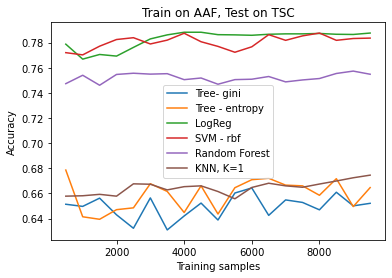

In [420]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random_aaf = dataloader_random(df_class_diff_aaf, balanced = True)
df_class_random_tsc = dataloader_random(df_class_diff_tsc, balanced = True)

#2) Train classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = None)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None)
clf_lr = LogisticRegression(random_state=0)
clf_svm = svm.SVC(kernel='rbf') 
clf_rf = RandomForestClassifier(n_estimators=100)
clf_knn = KNeighborsClassifier(n_neighbors=1)

#3) select data for train & test
n_train_range = np.arange(500,len(df_class_random_tsc),500)
n_iter = 5
accuracy_gini = []
accuracy_entropy = []
accuracy_lr = []
accuracy_svm = []
accuracy_rf = []
accuracy_knn = []

y_test = np.array(df_class_random_aaf["same_cluster"])
y_test = y_test
y_test = y_test.astype(float)

X_test = np.array(df_class_random_aaf[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]])


for n_train in n_train_range:
    #class labels
    y = np.array(df_class_random_tsc["same_cluster"])
    y = y[0:n_train]
    y = y.astype(float)

    #attributes
    X = np.array(df_class_random_tsc[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])

    mean_gini = 0
    mean_entropy = 0
    mean_lr = 0
    mean_svm = 0
    mean_rf = 0
    mean_knn = 0
    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_gini = clf_gini.fit(X,y)
        clf_entropy = clf_entropy.fit(X,y)
        clf_lr = clf_lr.fit(X,y)
        clf_svm = clf_svm.fit(X,y)
        clf_rf = clf_rf.fit(X,y)
        clf_knn = clf_knn.fit(X,y)

        #5) Predict the response for test dataset
        y_pred_gini = clf_gini.predict(X_test)
        y_pred_entropy = clf_entropy.predict(X_test)
        y_pred_lr = clf_lr.predict(X_test)
        y_pred_svm = clf_svm.predict(X_test)
        y_pred_rf = clf_rf.predict(X_test)
        y_pred_knn = clf_knn.predict(X_test)

        #6) Evaluate model
        mean_gini += sklearn.metrics.accuracy_score(y_test, y_pred_gini)
        mean_entropy += sklearn.metrics.accuracy_score(y_test, y_pred_entropy)
        mean_lr += sklearn.metrics.accuracy_score(y_test, y_pred_lr)
        mean_svm += sklearn.metrics.accuracy_score(y_test, y_pred_svm)
        mean_rf += sklearn.metrics.accuracy_score(y_test,y_pred_rf)
        mean_knn += sklearn.metrics.accuracy_score(y_test,y_pred_knn)
    
    #7) take average
    accuracy_gini.append(mean_gini/n_iter)
    accuracy_entropy.append(mean_entropy/n_iter)
    accuracy_lr.append(mean_lr/n_iter)
    accuracy_svm.append(mean_svm/n_iter)
    accuracy_rf.append(mean_rf/n_iter)
    accuracy_knn.append(mean_knn/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_gini)
plt.plot(n_train_range, accuracy_entropy)
plt.plot(n_train_range, accuracy_lr)
plt.plot(n_train_range, accuracy_svm)
plt.plot(n_train_range, accuracy_rf)
plt.plot(n_train_range, accuracy_knn)
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["Tree- gini", "Tree - entropy", "LogReg", "SVM - rbf", "Random Forest", "KNN, K=1"])
plt.title("Train on AAF, Test on TSC")

print(max(accuracy_rf))
plt.savefig("TrainTSC_TestAAF_Balanced.png", bbox_inches="tight", dpi = 1000)

## 9b) Compare classifiers trained on both datasets
- Test on AAF

Samples drawn: 6220
Samples drawn: 9952
500 datapoints: 2.650874614715576 secs
1000 datapoints: 5.976613521575928 secs
1500 datapoints: 10.130815267562866 secs
2000 datapoints: 14.966376781463623 secs
2500 datapoints: 21.392444133758545 secs
3000 datapoints: 29.026149034500122 secs
3500 datapoints: 37.608901023864746 secs
4000 datapoints: 46.60038352012634 secs
4500 datapoints: 56.64772939682007 secs
5000 datapoints: 67.78139019012451 secs
5500 datapoints: 80.23463749885559 secs
6000 datapoints: 95.28109431266785 secs
Time taken: 95.28209137916565 secs
0.7086213826366559


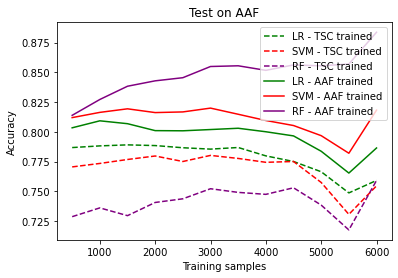

In [439]:
# Unbalanced dataset
tic = time.time()

#1) Get dataset into correct format
df_class_random_aaf = dataloader_random(df_class_diff_aaf, balanced = True)
df_class_random_tsc = dataloader_random(df_class_diff_tsc, balanced = True)

#2) Train classifier
clf_lr_tsc = LogisticRegression(random_state=0)
clf_svm_tsc = svm.SVC(kernel='rbf') 
clf_rf_tsc = RandomForestClassifier(n_estimators=100)
clf_lr_aaf = LogisticRegression(random_state=0)
clf_svm_aaf = svm.SVC(kernel='rbf') 
clf_rf_aaf = RandomForestClassifier(n_estimators=100)

#3) select data for train & test
n_train_max = min(len(df_class_random_aaf), len(df_class_random_tsc))
n_train_range = np.arange(500,n_train_max,500)
n_iter = 5

accuracy_lr_tsc = []
accuracy_svm_tsc = []
accuracy_rf_tsc = []
accuracy_lr_aaf = []
accuracy_svm_aaf = []
accuracy_rf_aaf = []




for n_train in n_train_range:
    #class labels
    y_tsc = np.array(df_class_random_tsc["same_cluster"])
    y_tsc = y_tsc[0:n_train]
    y_tsc = y_tsc.astype(float)
    
    y_aaf = np.array(df_class_random_aaf["same_cluster"])
    y_aaf = y_aaf[0:n_train]
    y_aaf = y_aaf.astype(float)
    
    y_test = np.array(df_class_random_aaf["same_cluster"])
    y_test = y_test[n_train:]
    y_test = y_test.astype(float)

    #attributes
    X_tsc = np.array(df_class_random_tsc[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])
    X_aaf = np.array(df_class_random_aaf[["edge_length_diff", "origin_connections_diff", 
                                  "target_connections_diff", "total_connections_diff", 
                                  "max_angle_diff", "sum_angle_diff"]][0:n_train])
    
    X_test = np.array(df_class_random_aaf[["edge_length_diff", "origin_connections_diff", 
                              "target_connections_diff", "total_connections_diff", 
                              "max_angle_diff", "sum_angle_diff"]][n_train:])


    mean_lr_tsc = 0
    mean_svm_tsc = 0
    mean_rf_tsc = 0
    mean_lr_aaf = 0
    mean_svm_aaf = 0
    mean_rf_aaf = 0

    for i in range(n_iter):
        #4) Train Decision Tree Classifer
        clf_lr_tsc = clf_lr_tsc.fit(X_tsc,y_tsc)
        clf_svm_tsc = clf_svm_tsc.fit(X_tsc,y_tsc)
        clf_rf_tsc = clf_rf_tsc.fit(X_tsc,y_tsc)
        clf_lr_aaf = clf_lr_aaf.fit(X_aaf,y_aaf)
        clf_svm_aaf = clf_svm_aaf.fit(X_aaf,y_aaf)
        clf_rf_aaf = clf_rf_aaf.fit(X_aaf,y_aaf)

        #5) Predict the response for test dataset
        y_pred_lr_tsc = clf_lr_tsc.predict(X_test)
        y_pred_svm_tsc = clf_svm_tsc.predict(X_test)
        y_pred_rf_tsc = clf_rf_tsc.predict(X_test)
        y_pred_lr_aaf = clf_lr_aaf.predict(X_test)
        y_pred_svm_aaf = clf_svm_aaf.predict(X_test)
        y_pred_rf_aaf = clf_rf_aaf.predict(X_test)


        #6) Evaluate model
        mean_lr_tsc += sklearn.metrics.accuracy_score(y_test, y_pred_lr_tsc)
        mean_svm_tsc += sklearn.metrics.accuracy_score(y_test, y_pred_svm_tsc)
        mean_rf_tsc += sklearn.metrics.accuracy_score(y_test,y_pred_rf_tsc)
        mean_lr_aaf += sklearn.metrics.accuracy_score(y_test, y_pred_lr_aaf)
        mean_svm_aaf += sklearn.metrics.accuracy_score(y_test, y_pred_svm_aaf)
        mean_rf_aaf += sklearn.metrics.accuracy_score(y_test,y_pred_rf_aaf)

    
    #7) take average
    accuracy_lr_tsc.append(mean_lr_tsc/n_iter)
    accuracy_svm_tsc.append(mean_svm_tsc/n_iter)
    accuracy_rf_tsc.append(mean_rf_tsc/n_iter)
    accuracy_lr_aaf.append(mean_lr_aaf/n_iter)
    accuracy_svm_aaf.append(mean_svm_aaf/n_iter)
    accuracy_rf_aaf.append(mean_rf_aaf/n_iter)

    toc = time.time()
    print(n_train, "datapoints:", toc-tic, "secs")

toc = time.time()
print("Time taken:", toc-tic, "secs")
    
#8) Plot
plt.plot(n_train_range, accuracy_lr_tsc, color = "green")
plt.plot(n_train_range, accuracy_svm_tsc, color = "red")
plt.plot(n_train_range, accuracy_rf_tsc, color = "purple")
plt.plot(n_train_range, accuracy_lr_aaf, color = "green", linestyle = "dashed")
plt.plot(n_train_range, accuracy_svm_aaf, color = "red", linestyle = "dashed")
plt.plot(n_train_range, accuracy_rf_aaf, color = "purple", linestyle = "dashed")
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["LR - TSC trained", "SVM - TSC trained", "RF - TSC trained",
           "LR - AAF trained", "SVM - AAF trained", "RF - AAF trained"])
plt.title("Test on AAF")

print(max(accuracy_rf))
plt.savefig("TrainTSCAAF_TestAAF_Balanced.png", bbox_inches="tight", dpi = 1000)

0.7086213826366559


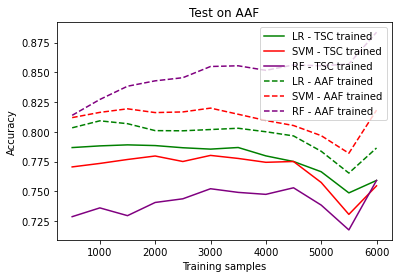

In [440]:
#8) Plot
plt.plot(n_train_range, accuracy_lr_tsc, color = "green")
plt.plot(n_train_range, accuracy_svm_tsc, color = "red")
plt.plot(n_train_range, accuracy_rf_tsc, color = "purple")
plt.plot(n_train_range, accuracy_lr_aaf, color = "green", linestyle = "dashed")
plt.plot(n_train_range, accuracy_svm_aaf, color = "red", linestyle = "dashed")
plt.plot(n_train_range, accuracy_rf_aaf, color = "purple", linestyle = "dashed")
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.legend(["LR - TSC trained", "SVM - TSC trained", "RF - TSC trained",
           "LR - AAF trained", "SVM - AAF trained", "RF - AAF trained"])
plt.title("Test on AAF")

print(max(accuracy_rf))
plt.savefig("TrainTSCAAF_TestAAF_Balanced.png", bbox_inches="tight", dpi = 1000)